## Clustering

Before implementing a complex Graph Neural Network (GNN) for unsupervised clustering, I want to clarify the problem, as the current research proposal seems vague. This step will help me understand our current leads and establish solid baselines. I aim for this research to be reproducible and fully open-sourced, facilitating easy use of our codebase and baselines by other researchers trying different methods.

### Settings

1. **Chunk Definition:**
   - A Chunk is a of 100 words.
   - For a book with 160 words, it will be split into: 1 chunk of 100 words each, plus 1 sentence of 60 words.

2. **Data Source:**
   - Using non-biblical Hebrew Qumran scrolls (383 books).

3. **Composition Labels:**
   - A composition is a label consisting of several books together.
   - For example, books 11Q20 and 11Q19 are from the Temple Scroll composition.
   - We currently have 25 unique compositions over 98 books.

4. **Clustering Methodology:**
   - **Step 1:** Convert each book into sentences.
   - **Step 2:** Vectorize the text (using n-grams, TF-IDF, Word2Vec, BERT, etc.).
   - **Step 3:** Clustering:
     - **Unsupervised Clustering:** 
       - Hierarchical Clustering
   - **Step 4:** Evaluation:
     - **Unsupervised Evaluation:** Metrics from [Cluster Analysis: Evaluation and Assessment](https://en.wikipedia.org/wiki/Cluster_analysis#Evaluation_and_assessment).
       - Examples: [Rand Index](https://en.wikipedia.org/wiki/Rand_index), [Silhouette Score](https://en.wikipedia.org/wiki/Silhouette_(clustering)), [Calinski-Harabasz Index](https://en.wikipedia.org/wiki/Calinski%E2%80%93Harabasz_index), etc.
       - The main objective will be the dasgupta score.

### Consideration for Supervised Clustering

- **Question:** Should we also perform supervised clustering?
  - **Labels:** Could be book or composition.
  - **Benefit:** This step could enhance confidence in our unsupervised methods.

### Clustering Objectives
We can explore various clustering strategies:

1. **Clustering by Chunk:**
   - Cluster chunks across all scrolls, when we wish to have chunks from the same composition together, and chunks that are close in the scrolls, also close together.

2. **Clustering by Composition:**
   - Cluster chunks to ensure they belong to the correct composition.

3. **Clustering within a Book:**
   - Cluster chunks to group those that are textually close within each book (as proposed in the research proposal).

4. **Clustering of Serech Hayahad:**
   - Focus specifically on clustering within the Serech Hayahad text.

5. **Temple Scroll Clustering:**
   - Differentiate between sectarian and non-sectarian content within the Temple Scroll.


### Reading list
1. [Document Embedding Techniques](https://towardsdatascience.com/document-embedding-techniques-fed3e7a6a25d)
2. Mining text data - book
3. [clustering-sentence-embeddings-to-identify-intents-in-short-text - PRACTICAL](https://towardsdatascience.com/clustering-sentence-embeddings-to-identify-intents-in-short-text-48d22d3bf02e)
4. [Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks](https://arxiv.org/abs/1908.10084)
5. [Open Intent Discovery through Unsupervised
Semantic Clustering and Dependency Parsing](https://arxiv.org/pdf/2104.12114)
6. [Is Everything in Order? A Simple Way to Order Sentences](https://aclanthology.org/2021.emnlp-main.841.pdf)
7. [The performance of BERT as data representation of text clustering](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-022-00564-9)
8. [Understanding and explaining Delta measures for authorship attribution](https://academic.oup.com/dsh/article/32/suppl_2/ii4/3865676)

Word ordering:
1. [Word Ordering as Unsupervised Learning
Towards Syntactically Plausible Word Representations](https://aclanthology.org/I17-1008.pdf)
2. [UNSUPERVISED ORDER LEARNING](https://openreview.net/pdf?id=1CK45cqkEh)
3. [Graph based Neural Sentence Ordering](https://github.com/DeepLearnXMU/NSEG)
4. [Graph based Neural Sentence Ordering](https://arxiv.org/pdf/1611.02654v2)
5. [A New Sentence Ordering Method Using BERT
Pretrained Model](https://arxiv.org/pdf/2108.11994)
6. https://openreview.net/pdf?id=S1AG8zYeg

Surveys:
1. [Short Text Clustering Algorithms, Application and Challenges: A Survey](https://www.mdpi.com/2076-3417/13/1/342)
2. [Incremental hierarchical text clustering methods: a review](https://arxiv.org/html/2312.07769v1)
3. [A comprehensive survey of clustering algorithms: State-of-the-art machine learning applications, taxonomy, challenges, and future research prospects](https://www.sciencedirect.com/science/article/pii/S095219762200046X)
4. [A Systematic Literature Review on Identifying Patterns Using Unsupervised Clustering Algorithms: A Data Mining Perspective](https://www.mdpi.com/2073-8994/15/9/1679)
5. [Constrained Clustering: Current and New Trends](https://link.springer.com/chapter/10.1007/978-3-030-06167-8_14) - offline

Clustering:
1. [Evaluation of Hierarchical Clustering Algorithms for
Document Datasets∗](https://dl.acm.org/doi/pdf/10.1145/584792.584877)
2. [An Objective for Hierarchical Clustering in Euclidean Space and its Connection to
Bisecting K-means∗](https://arxiv.org/pdf/2008.13235)
3. [Hierarchical Clustering: Objective Functions and Algorithms](https://arxiv.org/pdf/1704.02147)
4. [Evaluation Metrics for Unsupervised Learning
Algorithms](https://arxiv.org/pdf/1905.05667)

Stylometry:
1. [https://pan.webis.de/organization.html](PAN - organiztion fot text forensics)
2. [Surveying Stylometry Techniques and Applications](https://dl.acm.org/doi/10.1145/3132039)
3. Advanced Models for Stylometric Applications - offline
4. [A review on authorship attribution in text mining
](https://wires.onlinelibrary.wiley.com/doi/abs/10.1002/wics.1584)


Graphs:
1. [Graph Embedding Techniques, Applications, and Performance: A Survey](https://arxiv.org/pdf/1705.02801)


TODO:
1. Reading:
    2. EOSL - page 485(504) - unsupervised learning.
    3. Dasgupta - https://arxiv.org/pdf/1510.05043 

In [1]:

import pandas as pd

from config import BASE_DIR

RERUN = True

In [101]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

BERT_MODELS = ['dicta-il/BEREL', 'onlplab/alephbert-base', 'dicta-il/dictabert-tiny','dicta-il/dictabert-large', 'dicta-il/dictabert']
clustering_label = "composition"
CHUNK_SIZE = 100
DATA_PATH = f"{BASE_DIR}/notebooks/data/filtered_text_and_starr_features_{CHUNK_SIZE}_words_nonbib_17_06_2024.csv"
df = pd.read_csv(DATA_PATH)
df_grouped = df.groupby("book")["text"].apply(' '.join).reset_index()
book_info = df[["book", "composition", "section", "text_lex"]].drop_duplicates()
df_by_book = pd.merge(df_grouped, book_info, on="book", how="inner").drop_duplicates(["book"])

df_by_book_non_nulls = df_by_book[~(df_by_book[clustering_label].isna())]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 25 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   book                                                                1365 non-null   object 
 1   sentence_path                                                       1365 non-null   object 
 2   text_lex                                                            1362 non-null   object 
 3   text                                                                1365 non-null   object 
 4   n_words_lex                                                         1365 non-null   int64  
 5   n_words                                                             1365 non-null   int64  
 6   construct to absolute nouns ratio                                   1365 non-null   float64
 7   construct nouns

In [4]:
df["book"].unique()

array(['CD', '1QS', '1QSa', '1QSb', '1QpHab', '1QM', '1QHa', '1Q22',
       '3Q15', '4Q158', '4Q161', '4Q163', '4Q169', '4Q171', '4Q174',
       '4Q176', '4Q177', '4Q200', '4Q216', '4Q219', '4Q221', '4Q223_224',
       '4Q249z', '4Q251', '4Q252', '4Q256', '4Q257', '4Q258', '4Q259',
       '4Q265', '4Q266', '4Q267', '4Q269', '4Q270', '4Q271', '4Q274',
       '4Q286', '4Q299', '4Q317', '4Q319', '4Q320', '4Q321', '4Q321a',
       '4Q364', '4Q365', '4Q365a', '4Q366', '4Q367', '4Q368', '4Q372',
       '4Q378', '4Q379', '4Q381', '4Q382', '4Q385a', '4Q387', '4Q391',
       '4Q394', '4Q397', '4Q400', '4Q403', '4Q405', '4Q415', '4Q416',
       '4Q417', '4Q418', '4Q422', '4Q423', '4Q427', '4Q428', '4Q429',
       '4Q432', '4Q434', '4Q491', '4Q496', '4Q502', '4Q503', '4Q504',
       '4Q509', '4Q511', '4Q512', '4Q522', '4Q524', '4Q525', '11Q11',
       '11Q12', '11Q13', '11Q17', '11Q19', '11Q20'], dtype=object)

Our dataset contains chunks of 100 words (using scrolls that have more than 300 words and written in hebrew).
I will use 4 different vectorizers: Starr, trigrams, BERT, tf-idf. When our metric for clustering will be the dgapusta score.

## Functions

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sknetwork.hierarchy import dasgupta_score as calculate_dasgupta_score
import sklearn.cluster as sk
from tqdm.notebook import tqdm
from datetime import datetime
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
import scipy.sparse as sp
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt


def get_starr_features():
    from src.features.Starr.features_keys import feature_list
    return [i[0] for i in feature_list]


def bert_embed(texts, model, tokenizer):
    all_embeddings = []
    for text in tqdm(texts, desc="bert"):
        # Tokenize the text

        inputs = tokenizer(
            text,
            return_tensors='pt',
            padding=True,  # Pad sequences to the length of the longest sequence in the batch
            truncation=True,  # Truncate sequences longer than max_length
            max_length=tokenizer.model_max_length  #512
        )
        with torch.no_grad():
            outputs = model(**inputs)

        # Take the mean of the last hidden state for the embedding
        embedding = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
        # print("Shape of last_hidden_state:", outputs.last_hidden_state.shape)
        # print("Shape of pooler_output:", outputs.pooler_output.shape)
        # print("Shape of embedding:", embedding.shape)

        all_embeddings.append(embedding)
    return np.vstack(all_embeddings)


def init_bert_vectorizer(df,text_column, model_name):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)
    vectorizer_matrix = bert_embed(df[text_column].tolist(), model, tokenizer)
    return vectorizer_matrix


def vectorize_text(df, text_column, vectorizer_type):
    if vectorizer_type == 'tfidf':
        vectorizer = TfidfVectorizer()
        vectorizer_matrix = vectorizer.fit_transform(df[text_column])
    elif vectorizer_type == 'trigram':
        vectorizer = CountVectorizer(ngram_range=(3, 3), analyzer='char')
        vectorizer_matrix = vectorizer.fit_transform(df[text_column])
    elif vectorizer_type == 'BOW':
        vectorizer = CountVectorizer(analyzer='word')
        vectorizer_matrix = vectorizer.fit_transform(df[text_column])
    elif vectorizer_type == 'starr':
        starr_cols = get_starr_features()
        vectorizer_matrix = df[starr_cols].to_numpy()

    elif vectorizer_type in BERT_MODELS:
        model_name = vectorizer_type
        vectorizer_matrix = init_bert_vectorizer(df,text_column, model_name)
    else:
        raise ValueError("Unsupported vectorizer type.")
    return vectorizer_matrix

def get_linkage_matrix(model):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in (enumerate(model.children_)):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    return linkage_matrix


def shorten_path(sentence_path):
    splitted = [i.split(":") for i in sentence_path.split("-")]
    return f'{splitted[0][0]}:{splitted[0][1]}-{splitted[1][0]}'


def matplotlib_dendrogram(linkage_matrix, sample_names, metadata):
    plt.figure(figsize=(25, 18))
    dendrogram(
        linkage_matrix,
        leaf_label_func=lambda x: shorten_path(sample_names[x]),
        orientation="right",
        color_threshold=0.7 * max(linkage_matrix[:, 2])  # Adjust color threshold
    )

    plt.title(metadata["vectorizer_type"], fontsize=16)
    plt.ylabel("Scroll:Line-Line")
    plt.tick_params(
        axis="x",  # changes apply to the x-axis
        which="both",  # both major and minor ticks are affected
        bottom=False,  # ticks along the bottom edge are off
        top=False,  # ticks along the top edge are off
        labelbottom=False,
    )
    plt.tick_params(
        axis="y",  # changes apply to the x-axis
        which="both",  # both major and minor ticks are affected,
        labelsize=12,
    )
    plt.tight_layout()
    plt.show()


def get_clusters_scores(
        df,
        label_name,
        vectorizer_matrix,
        linkage_criterion,
        adjacency_matrix,
        plot=False,
        metadata=None
):
    if sp.issparse(vectorizer_matrix):
        vectorizer_matrix = vectorizer_matrix.toarray()
    sample_names = df[label_name].to_list()
    model = sk.AgglomerativeClustering(
        distance_threshold=0, n_clusters=None, linkage=linkage_criterion
    )
    print(f"{datetime.now()} - fitting AgglomerativeClustering")
    model.fit_predict(vectorizer_matrix)
    # adjacency_matrix = np.zeros((len(sample_names), len(sample_names)))
    # for i in range(0, adjacency_matrix.shape[0] - 1):
    #     adjacency_matrix[i, i + 1] = 1
    #     adjacency_matrix[i + 1, i] = 1
    print(f"{datetime.now()} - getting linkage matrix")
    linkage_matrix = get_linkage_matrix(model)

    print(f"{datetime.now()} - calculate_dasgupta_score")
    score = calculate_dasgupta_score(adjacency_matrix, linkage_matrix)
    if plot:
        matplotlib_dendrogram(linkage_matrix, sample_names, metadata)

    return score, linkage_matrix


def get_random_clusters_score(
        df,
        label_name,
        vectorizer_matrix,
        linkage_criterion,
        iters=10
):
    random_scores = []
    if sp.issparse(vectorizer_matrix):
        vectorizer_matrix = vectorizer_matrix.toarray()
    sample_names = df[label_name].to_list()
    print(f"{datetime.now()} - calculate rand dasgupta_score")
    for i in tqdm(range(iters)):
        indexes = np.arange(len(vectorizer_matrix))
        np.random.shuffle(indexes)
        model = sk.AgglomerativeClustering(
            distance_threshold=0, n_clusters=None, linkage="ward"
        )
        model.fit_predict(vectorizer_matrix[indexes])
        linkage_matrix = get_linkage_matrix(model)
        adjacency_matrix = np.zeros((len(sample_names), len(sample_names)))
        for i in range(0, adjacency_matrix.shape[0] - 1):
            adjacency_matrix[i, i + 1] = 1
            adjacency_matrix[i + 1, i] = 1

        dasgupta_score_rand = calculate_dasgupta_score(adjacency_matrix, linkage_matrix)
        random_scores.append(dasgupta_score_rand)

    return np.mean(np.array(random_scores))


def create_adjacency_matrix(sampled_df, context_similiarity_window, composition_level=True):
    # Compress the DataFrame only to the required columns
    compressed_df = sampled_df[["original_index", "book", "composition"]]

    # Convert DataFrame columns to numpy arrays for faster access
    original_indices = compressed_df['original_index'].to_numpy()
    books = compressed_df['book'].to_numpy()
    compositions = compressed_df['composition'].to_numpy()

    # Initialize the adjacency matrix
    n = len(compressed_df)
    adjacency_matrix = np.zeros((n, n))

    # Loop to fill the adjacency matrix
    for i in tqdm(range(n), desc="Building adjacency matrix"):
        for j in range(i + 1, n):  # Only compute half since the matrix is symmetric
            if original_indices[i] == original_indices[j]:
                continue
            distance = np.abs(original_indices[i] - original_indices[j])

            if 0 < distance <= context_similiarity_window and books[i] == books[j]:
                adjacency_matrix[i, j] += 1 / distance
                adjacency_matrix[j, i] += 1 / distance

            if composition_level and compositions[i] == compositions[j] and (compositions[i] is not None) and (
                    books[i] != books[j]):
                adjacency_matrix[i, j] += 1
                adjacency_matrix[j, i] += 1

    return adjacency_matrix


# Define the stratified sampling function
def stratified_sample(df, stratify_column, frac, random_state=None):
    df = df.reset_index().rename(columns={"index": "original_index"})
    grouped = df.groupby(stratify_column)
    stratified_df = grouped.apply(lambda x: x.sample(frac=frac, random_state=random_state)).reset_index(drop=True)
    stratified_df = stratified_df.sort_values(by="original_index")
    return stratified_df


import seaborn as sns
from scipy.stats import ttest_ind


def create_dasgupta_score_plot(scores_df, chunk_size, num_cvs, frac, linkage_method, file_name, show_p_val=False,
                               p_val_random_test=True, show_mean_scores=True):
    """
    This function creates a box plot of Dasgupta scores for different vectorizer types.

    Args:
        scores: A dictionary containing the scores.
        chunk_size: Size of the chunks used for vectorization (in words).
        num_cvs: Number of cross-validation folds used.
        frac: Fraction of the data used in each CV sample.
        p_val_random_test: Whether to calculate p-values against a random baseline (True) or own baseline (False).
        show_mean_scores: Whether to display the mean score for each vectorizer group (True).
    """
    mean_rand_score = scores_df['dasgupta_score_rand'].mean()
    long_scores_df = pd.melt(scores_df, id_vars=['vectorizer'], value_vars=['dasgupta_score', 'dasgupta_score_rand'])

    p_values = {}
    for vectorizer in scores_df['vectorizer'].unique():
        dasgupta_scores = scores_df[scores_df['vectorizer'] == vectorizer]['dasgupta_score']
        if p_val_random_test:
            rand_scores = scores_df[scores_df['vectorizer'] == vectorizer]['dasgupta_score_rand']
        else:
            rand_scores = scores_df[scores_df['vectorizer'] == vectorizer]['dasgupta_score']
        _, p_value = ttest_ind(dasgupta_scores, rand_scores, alternative='greater')
        p_values[vectorizer] = p_value

    # Set the style of the visualization
    sns.set(style="whitegrid", context="paper", font_scale=1.5)

    # Create the box plot
    plt.figure(figsize=(15, 10))
    ax = sns.boxplot(data=long_scores_df, x="vectorizer", y="value", hue="variable", palette="Set3")
    sns.stripplot(data=long_scores_df, x="vectorizer", y="value", hue="variable",
                  linewidth=1, alpha=0.4, dodge=True, palette="Set3")

    # Plot the mean random score as a dashed line
    plt.axhline(y=mean_rand_score, color='r', linestyle='--', label="Mean random score")

    # Calculate mean for each vectorizer group
    mean_scores = long_scores_df[long_scores_df["variable"] == "dasgupta_score"].groupby('vectorizer')['value'].mean()

    if show_p_val:
        for i, vectorizer in enumerate(p_values.keys()):
            p_val = p_values[vectorizer]
            ax.text(i, long_scores_df[long_scores_df['vectorizer'] == vectorizer]['value'].min() - 0.05,
                    f'$p={p_val:.3f}$', ha='center', va='bottom', fontsize=12, color='black')

    if show_mean_scores:
        for i, vectorizer in enumerate(long_scores_df["vectorizer"].unique()):
            mean_value = mean_scores.loc[vectorizer]
            ax.text(i, min(long_scores_df[(long_scores_df['vectorizer'] == vectorizer) &
                                          (long_scores_df['variable'] == "dasgupta_score")]['value']) - 0.03,
                    f'mean={mean_value:.3f}', ha='center', va='bottom', fontsize=12, color='black')

    # Add a title and labels
    plt.suptitle("Dasgupta Score by Vectorizer Type", fontsize=20)
    plt.title(
        f"Linkage: {linkage_method}, Chunk size: {chunk_size} words, {num_cvs} cross-validation, each CV sample {frac:.0%} from the data",
        fontsize=16)
    plt.xlabel('Vectorizer Type', fontsize=16)
    plt.ylabel('Dasgupta Score', fontsize=16)

    # Customize the legend
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles=handles[0:2], labels=labels[0:2], title='Score Type', fontsize=14, title_fontsize=16,
               loc='best', ncol=3)

    
    

    # Improve layout
    plt.tight_layout()
    # plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Remove top and right spines for a cleaner look
    sns.despine(offset=5, trim=True)
    plt.xticks(rotation=45)
    plt.savefig(f"{file_name}.png")
    plt.show()


from itertools import groupby
from collections import Counter


def get_metrics_from_LCA(feature_order):
    n_chunks_df = pd.DataFrame([Counter([i.split(":")[0] for i in feature_order])], index=["n_chunks"]).T
    scrolls = [item.split(':')[0] for item in feature_order]

    # Initialize a dictionary to store the results
    scroll_analysis = {}

    # Group by consecutive scrolls
    for scroll, group in groupby(scrolls):
        group_list = list(group)
        if scroll not in scroll_analysis:
            scroll_analysis[scroll] = {
                'sequences': [],
            }
        scroll_analysis[scroll]['sequences'].append(len(group_list))

    # Compute the number of sequences and mean sequence length for each scroll
    for scroll in scroll_analysis:
        sequences = scroll_analysis[scroll]['sequences']
        number_of_sequences = len(sequences)
        scroll_analysis[scroll] = {
            'n_sequences': number_of_sequences,
        }
    res = pd.DataFrame(scroll_analysis).T.join(n_chunks_df)
    res["1-n_sequences/n_chunks"] = 1 - res["n_sequences"] / res["n_chunks"]

    # Initialize a dictionary to store the first and last occurrence of each scroll
    scroll_positions = {}

    for index, scroll in enumerate(scrolls):
        if scroll not in scroll_positions:
            scroll_positions[scroll] = [index, index]  # [first_occurrence, last_occurrence]
        else:
            scroll_positions[scroll][1] = index  # Update last_occurrence

    # Calculate the maximum distance between the first and last occurrence for each scroll
    max_distances = {scroll: positions[1] - positions[0] + 1 for scroll, positions in scroll_positions.items()}
    max_distances = pd.DataFrame([max_distances]).T.rename(columns={0: "max_dist"}).sort_values(by="max_dist")
    final_res = max_distances.join(res)
    final_res["n_chunks/max_dist"] = final_res["n_chunks"] / final_res["max_dist"]
    return final_res.sort_values(by="n_chunks/max_dist"), final_res['n_chunks/max_dist'].mean(), final_res[
        'n_chunks/max_dist'].std()


def create_lca_metric_boxplot(scores_df, file_name):
    # Set the style of the visualization
    sns.set(style="whitegrid", context="paper", font_scale=1.5)

    # Create the box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='vectorizer', y='max_dist_metric_mean', hue='vectorizer', data=scores_df, palette="Set3",
                legend=False)

    # Add a title and labels
    plt.title("max-dist Metric Mean by Vectorizer Type", fontsize=20)
    plt.xlabel('Vectorizer Type', fontsize=16)
    plt.ylabel('max-dist Metric Mean', fontsize=16)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Improve layout
    plt.tight_layout()

    # Save the plot
    plt.savefig(f"{file_name}.png")
    plt.show()


def get_dendrogram_feature_order(linkage_matrix, sample_names):
    dendro = dendrogram(
        linkage_matrix,
        leaf_label_func=lambda x: sample_names[x],
        orientation="right",
        no_plot=True  # Do not plot the dendrogram
    )

    feature_order = [sample_names[i] for i in dendro['leaves']]
    return feature_order


In [6]:
def run_clustering_cv(df, frac, num_cvs, context_similiarity_window, vectorizers, linkage_method):
    scores = []
    for i in tqdm(range(num_cvs)):
        # Sample 90% of the data
        sampled_df = stratified_sample(df, 'book', frac=frac, random_state=42 + i)
        print(f"{datetime.now()} - {sampled_df.shape=}")
        adjacency_matrix = create_adjacency_matrix(sampled_df, context_similiarity_window=context_similiarity_window,
                                                   composition_level=True)

        for vectorizer_type in tqdm(vectorizers):
            vectorizer_matrix = vectorize_text(sampled_df, "text", vectorizer_type)
            print(f"{datetime.now()} - {vectorizer_type=},{vectorizer_matrix.shape=}")

            dasgupta_score, linkage_matrix = get_clusters_scores(sampled_df, "sentence_path", vectorizer_matrix,
                                                                 linkage_method, adjacency_matrix, plot=False,
                                                                 metadata={"vectorizer_type": vectorizer_type})
            dasgupta_score_rand = get_random_clusters_score(sampled_df, "sentence_path", vectorizer_matrix, "ward",
                                                            iters=2)
            print(f"{dasgupta_score=}, {dasgupta_score_rand=}\n")

            feature_order = get_dendrogram_feature_order(linkage_matrix, df["sentence_path"].to_list())
            _, LCA_metric_mean, LCA_metric_std = get_metrics_from_LCA(feature_order)

            scores.append({"vectorizer": vectorizer_type, "dasgupta_score": dasgupta_score,
                           "dasgupta_score_rand": dasgupta_score_rand, "max_dist_metric_mean": LCA_metric_mean,
                           "cv": i})

    # Convert scores to a DataFrame for easier analysis
    scores_df = pd.DataFrame(scores)
    return scores_df



## Hirerchial clustering baseline with different vectorizers

In [11]:
import random
def set_seed_globaly(seed=42):
    #Set seeds
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    

  0%|          | 0/10 [00:00<?, ?it/s]

2024-06-17 19:16:18.025489 - sampled_df.shape=(1218, 26)


Building adjacency matrix:   0%|          | 0/1218 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/BEREL and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 19:18:45.358745 - vectorizer_type='dicta-il/BEREL',vectorizer_matrix.shape=(1218, 768)
2024-06-17 19:18:45.359186 - fitting AgglomerativeClustering
2024-06-17 19:18:45.745370 - getting linkage matrix
2024-06-17 19:18:45.756937 - calculate_dasgupta_score
2024-06-17 19:18:45.857519 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6999194164033207, dasgupta_score_rand=0.3292990785978065



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 19:21:42.909853 - vectorizer_type='onlplab/alephbert-base',vectorizer_matrix.shape=(1218, 768)
2024-06-17 19:21:42.910136 - fitting AgglomerativeClustering
2024-06-17 19:21:43.339841 - getting linkage matrix
2024-06-17 19:21:43.351525 - calculate_dasgupta_score
2024-06-17 19:21:43.453970 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6336904516408663, dasgupta_score_rand=0.3364659523742062



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-tiny and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 19:22:11.192108 - vectorizer_type='dicta-il/dictabert-tiny',vectorizer_matrix.shape=(1218, 312)
2024-06-17 19:22:11.192410 - fitting AgglomerativeClustering
2024-06-17 19:22:11.371541 - getting linkage matrix
2024-06-17 19:22:11.376600 - calculate_dasgupta_score
2024-06-17 19:22:11.480744 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5434800475926995, dasgupta_score_rand=0.3273210794532303



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-large and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 19:29:44.340249 - vectorizer_type='dicta-il/dictabert-large',vectorizer_matrix.shape=(1218, 1024)
2024-06-17 19:29:44.340500 - fitting AgglomerativeClustering
2024-06-17 19:29:44.876469 - getting linkage matrix
2024-06-17 19:29:44.879263 - calculate_dasgupta_score
2024-06-17 19:29:44.961453 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6793863434946936, dasgupta_score_rand=0.33421034523236093



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 19:31:54.565189 - vectorizer_type='dicta-il/dictabert',vectorizer_matrix.shape=(1218, 768)
2024-06-17 19:31:54.565442 - fitting AgglomerativeClustering
2024-06-17 19:31:54.905099 - getting linkage matrix
2024-06-17 19:31:54.915225 - calculate_dasgupta_score
2024-06-17 19:31:55.001584 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6729970648335499, dasgupta_score_rand=0.32875162078545184

2024-06-17 19:31:56.011912 - vectorizer_type='tfidf',vectorizer_matrix.shape=(1218, 17387)
2024-06-17 19:31:56.090166 - fitting AgglomerativeClustering
2024-06-17 19:32:04.510796 - getting linkage matrix
2024-06-17 19:32:04.512675 - calculate_dasgupta_score
2024-06-17 19:32:04.622227 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6509744248108456, dasgupta_score_rand=0.34559362236947044

2024-06-17 19:32:20.849307 - vectorizer_type='trigram',vectorizer_matrix.shape=(1218, 7251)
2024-06-17 19:32:20.883101 - fitting AgglomerativeClustering
2024-06-17 19:32:23.856810 - getting linkage matrix
2024-06-17 19:32:23.859008 - calculate_dasgupta_score
2024-06-17 19:32:23.933549 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5782634906604162, dasgupta_score_rand=0.3284291502564249

2024-06-17 19:32:30.074193 - vectorizer_type='starr',vectorizer_matrix.shape=(1218, 16)
2024-06-17 19:32:30.074254 - fitting AgglomerativeClustering
2024-06-17 19:32:30.106947 - getting linkage matrix
2024-06-17 19:32:30.111438 - calculate_dasgupta_score
2024-06-17 19:32:30.192725 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.4782048727542456, dasgupta_score_rand=0.3169922404685672

2024-06-17 19:32:30.426824 - sampled_df.shape=(1218, 26)


Building adjacency matrix:   0%|          | 0/1218 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/BEREL and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 19:34:37.407753 - vectorizer_type='dicta-il/BEREL',vectorizer_matrix.shape=(1218, 768)
2024-06-17 19:34:37.408100 - fitting AgglomerativeClustering
2024-06-17 19:34:37.737516 - getting linkage matrix
2024-06-17 19:34:37.747063 - calculate_dasgupta_score
2024-06-17 19:34:37.829201 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5869016425960007, dasgupta_score_rand=0.3275737263426041



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 19:36:54.376057 - vectorizer_type='onlplab/alephbert-base',vectorizer_matrix.shape=(1218, 768)
2024-06-17 19:36:54.376361 - fitting AgglomerativeClustering
2024-06-17 19:36:54.710339 - getting linkage matrix
2024-06-17 19:36:54.720216 - calculate_dasgupta_score
2024-06-17 19:36:54.807730 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6287491358581605, dasgupta_score_rand=0.3396383742628041



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-tiny and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 19:37:14.259539 - vectorizer_type='dicta-il/dictabert-tiny',vectorizer_matrix.shape=(1218, 312)
2024-06-17 19:37:14.259755 - fitting AgglomerativeClustering
2024-06-17 19:37:14.386294 - getting linkage matrix
2024-06-17 19:37:14.390210 - calculate_dasgupta_score
2024-06-17 19:37:14.458401 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6086251120085122, dasgupta_score_rand=0.33285131410113705



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-large and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 19:44:21.805208 - vectorizer_type='dicta-il/dictabert-large',vectorizer_matrix.shape=(1218, 1024)
2024-06-17 19:44:21.805505 - fitting AgglomerativeClustering
2024-06-17 19:44:22.272351 - getting linkage matrix
2024-06-17 19:44:22.282206 - calculate_dasgupta_score
2024-06-17 19:44:22.372191 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6409360852301798, dasgupta_score_rand=0.33141065340084996



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 19:46:39.872932 - vectorizer_type='dicta-il/dictabert',vectorizer_matrix.shape=(1218, 768)
2024-06-17 19:46:39.873166 - fitting AgglomerativeClustering
2024-06-17 19:46:40.202366 - getting linkage matrix
2024-06-17 19:46:40.212225 - calculate_dasgupta_score
2024-06-17 19:46:40.295491 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6424148242082888, dasgupta_score_rand=0.32770123038023186

2024-06-17 19:46:41.312707 - vectorizer_type='tfidf',vectorizer_matrix.shape=(1218, 17245)
2024-06-17 19:46:41.386438 - fitting AgglomerativeClustering
2024-06-17 19:46:49.093865 - getting linkage matrix
2024-06-17 19:46:49.102048 - calculate_dasgupta_score
2024-06-17 19:46:49.210478 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6450387927368628, dasgupta_score_rand=0.33769613021872685

2024-06-17 19:47:04.029460 - vectorizer_type='trigram',vectorizer_matrix.shape=(1218, 7243)
2024-06-17 19:47:04.062349 - fitting AgglomerativeClustering
2024-06-17 19:47:07.107644 - getting linkage matrix
2024-06-17 19:47:07.115782 - calculate_dasgupta_score
2024-06-17 19:47:07.200760 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5762456039741594, dasgupta_score_rand=0.33847430962297936

2024-06-17 19:47:13.354854 - vectorizer_type='starr',vectorizer_matrix.shape=(1218, 16)
2024-06-17 19:47:13.354927 - fitting AgglomerativeClustering
2024-06-17 19:47:13.385719 - getting linkage matrix
2024-06-17 19:47:13.388920 - calculate_dasgupta_score
2024-06-17 19:47:13.470889 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.4930993791775742, dasgupta_score_rand=0.33985020636764607

2024-06-17 19:47:13.726409 - sampled_df.shape=(1218, 26)


Building adjacency matrix:   0%|          | 0/1218 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/BEREL and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 19:49:24.605356 - vectorizer_type='dicta-il/BEREL',vectorizer_matrix.shape=(1218, 768)
2024-06-17 19:49:24.605689 - fitting AgglomerativeClustering
2024-06-17 19:49:24.919377 - getting linkage matrix
2024-06-17 19:49:24.926880 - calculate_dasgupta_score
2024-06-17 19:49:25.006281 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6141141410829039, dasgupta_score_rand=0.33294474959961046



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 19:51:51.182733 - vectorizer_type='onlplab/alephbert-base',vectorizer_matrix.shape=(1218, 768)
2024-06-17 19:51:51.182971 - fitting AgglomerativeClustering
2024-06-17 19:51:51.515625 - getting linkage matrix
2024-06-17 19:51:51.518294 - calculate_dasgupta_score
2024-06-17 19:51:51.595829 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6396017169710545, dasgupta_score_rand=0.3303278810178196



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-tiny and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 19:52:17.134158 - vectorizer_type='dicta-il/dictabert-tiny',vectorizer_matrix.shape=(1218, 312)
2024-06-17 19:52:17.134375 - fitting AgglomerativeClustering
2024-06-17 19:52:17.255414 - getting linkage matrix
2024-06-17 19:52:17.262061 - calculate_dasgupta_score
2024-06-17 19:52:17.327715 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5860497739858237, dasgupta_score_rand=0.322378780089941



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-large and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:00:08.432786 - vectorizer_type='dicta-il/dictabert-large',vectorizer_matrix.shape=(1218, 1024)
2024-06-17 20:00:08.433072 - fitting AgglomerativeClustering
2024-06-17 20:00:08.882650 - getting linkage matrix
2024-06-17 20:00:08.890244 - calculate_dasgupta_score
2024-06-17 20:00:08.967334 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5842374752218298, dasgupta_score_rand=0.3289624409534875



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:02:35.658548 - vectorizer_type='dicta-il/dictabert',vectorizer_matrix.shape=(1218, 768)
2024-06-17 20:02:35.658772 - fitting AgglomerativeClustering
2024-06-17 20:02:35.962464 - getting linkage matrix
2024-06-17 20:02:35.969826 - calculate_dasgupta_score
2024-06-17 20:02:36.047531 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.659319783803927, dasgupta_score_rand=0.3337064007026891

2024-06-17 20:02:36.961034 - vectorizer_type='tfidf',vectorizer_matrix.shape=(1218, 17310)
2024-06-17 20:02:37.035559 - fitting AgglomerativeClustering
2024-06-17 20:02:44.605621 - getting linkage matrix
2024-06-17 20:02:44.611951 - calculate_dasgupta_score
2024-06-17 20:02:44.709930 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6644989273696165, dasgupta_score_rand=0.33833466234367265

2024-06-17 20:02:59.584709 - vectorizer_type='trigram',vectorizer_matrix.shape=(1218, 7237)
2024-06-17 20:02:59.617995 - fitting AgglomerativeClustering
2024-06-17 20:03:02.609579 - getting linkage matrix
2024-06-17 20:03:02.616074 - calculate_dasgupta_score
2024-06-17 20:03:02.693984 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6080490728915835, dasgupta_score_rand=0.3418163995828122

2024-06-17 20:03:08.979075 - vectorizer_type='starr',vectorizer_matrix.shape=(1218, 16)
2024-06-17 20:03:08.979155 - fitting AgglomerativeClustering
2024-06-17 20:03:09.017472 - getting linkage matrix
2024-06-17 20:03:09.025164 - calculate_dasgupta_score
2024-06-17 20:03:09.104490 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.48255128122547697, dasgupta_score_rand=0.3322751847459297

2024-06-17 20:03:09.332436 - sampled_df.shape=(1218, 26)


Building adjacency matrix:   0%|          | 0/1218 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/BEREL and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:05:31.486384 - vectorizer_type='dicta-il/BEREL',vectorizer_matrix.shape=(1218, 768)
2024-06-17 20:05:31.486714 - fitting AgglomerativeClustering
2024-06-17 20:05:31.800393 - getting linkage matrix
2024-06-17 20:05:31.808691 - calculate_dasgupta_score
2024-06-17 20:05:31.889564 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6960862961988593, dasgupta_score_rand=0.3366609188656054



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:08:12.522841 - vectorizer_type='onlplab/alephbert-base',vectorizer_matrix.shape=(1218, 768)
2024-06-17 20:08:12.523068 - fitting AgglomerativeClustering
2024-06-17 20:08:12.835382 - getting linkage matrix
2024-06-17 20:08:12.837932 - calculate_dasgupta_score
2024-06-17 20:08:12.918213 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6182719896205511, dasgupta_score_rand=0.33494197554351124



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-tiny and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:08:36.856220 - vectorizer_type='dicta-il/dictabert-tiny',vectorizer_matrix.shape=(1218, 312)
2024-06-17 20:08:36.856422 - fitting AgglomerativeClustering
2024-06-17 20:08:36.990250 - getting linkage matrix
2024-06-17 20:08:36.998029 - calculate_dasgupta_score
2024-06-17 20:08:37.070181 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6501207659509878, dasgupta_score_rand=0.34600210752705585



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-large and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:16:22.032395 - vectorizer_type='dicta-il/dictabert-large',vectorizer_matrix.shape=(1218, 1024)
2024-06-17 20:16:22.032674 - fitting AgglomerativeClustering
2024-06-17 20:16:22.461253 - getting linkage matrix
2024-06-17 20:16:22.463764 - calculate_dasgupta_score
2024-06-17 20:16:22.534380 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6337825836096207, dasgupta_score_rand=0.3266997502539962



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:18:42.176974 - vectorizer_type='dicta-il/dictabert',vectorizer_matrix.shape=(1218, 768)
2024-06-17 20:18:42.177209 - fitting AgglomerativeClustering
2024-06-17 20:18:42.494065 - getting linkage matrix
2024-06-17 20:18:42.496652 - calculate_dasgupta_score
2024-06-17 20:18:42.570159 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6729746813208267, dasgupta_score_rand=0.3461522114866971

2024-06-17 20:18:43.512989 - vectorizer_type='tfidf',vectorizer_matrix.shape=(1218, 17241)
2024-06-17 20:18:43.586252 - fitting AgglomerativeClustering
2024-06-17 20:18:51.164020 - getting linkage matrix
2024-06-17 20:18:51.166004 - calculate_dasgupta_score
2024-06-17 20:18:51.266208 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6804476988833457, dasgupta_score_rand=0.32582375029177507

2024-06-17 20:19:06.217791 - vectorizer_type='trigram',vectorizer_matrix.shape=(1218, 7209)
2024-06-17 20:19:06.251676 - fitting AgglomerativeClustering
2024-06-17 20:19:09.244460 - getting linkage matrix
2024-06-17 20:19:09.252883 - calculate_dasgupta_score
2024-06-17 20:19:09.348820 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6087683166944095, dasgupta_score_rand=0.33692166124943174

2024-06-17 20:19:15.546283 - vectorizer_type='starr',vectorizer_matrix.shape=(1218, 16)
2024-06-17 20:19:15.546367 - fitting AgglomerativeClustering
2024-06-17 20:19:15.582208 - getting linkage matrix
2024-06-17 20:19:15.584056 - calculate_dasgupta_score
2024-06-17 20:19:15.661840 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.4991617852094461, dasgupta_score_rand=0.3303727435495775

2024-06-17 20:19:15.911573 - sampled_df.shape=(1218, 26)


Building adjacency matrix:   0%|          | 0/1218 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/BEREL and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:21:34.100313 - vectorizer_type='dicta-il/BEREL',vectorizer_matrix.shape=(1218, 768)
2024-06-17 20:21:34.100657 - fitting AgglomerativeClustering
2024-06-17 20:21:34.413448 - getting linkage matrix
2024-06-17 20:21:34.423048 - calculate_dasgupta_score
2024-06-17 20:21:34.510503 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6817173870386928, dasgupta_score_rand=0.3259492304557899



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:24:07.035844 - vectorizer_type='onlplab/alephbert-base',vectorizer_matrix.shape=(1218, 768)
2024-06-17 20:24:07.036079 - fitting AgglomerativeClustering
2024-06-17 20:24:07.356298 - getting linkage matrix
2024-06-17 20:24:07.365508 - calculate_dasgupta_score
2024-06-17 20:24:07.457077 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.678807540729388, dasgupta_score_rand=0.33142515782841064



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-tiny and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:24:32.863889 - vectorizer_type='dicta-il/dictabert-tiny',vectorizer_matrix.shape=(1218, 312)
2024-06-17 20:24:32.864088 - fitting AgglomerativeClustering
2024-06-17 20:24:32.989513 - getting linkage matrix
2024-06-17 20:24:32.995168 - calculate_dasgupta_score
2024-06-17 20:24:33.062566 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5771703430625059, dasgupta_score_rand=0.3241763171706787



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-large and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:31:54.607453 - vectorizer_type='dicta-il/dictabert-large',vectorizer_matrix.shape=(1218, 1024)
2024-06-17 20:31:54.607690 - fitting AgglomerativeClustering
2024-06-17 20:31:55.080610 - getting linkage matrix
2024-06-17 20:31:55.089168 - calculate_dasgupta_score
2024-06-17 20:31:55.167417 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6216600249220642, dasgupta_score_rand=0.3431865620189085



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:34:18.722291 - vectorizer_type='dicta-il/dictabert',vectorizer_matrix.shape=(1218, 768)
2024-06-17 20:34:18.722525 - fitting AgglomerativeClustering
2024-06-17 20:34:19.081679 - getting linkage matrix
2024-06-17 20:34:19.089880 - calculate_dasgupta_score
2024-06-17 20:34:19.178137 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6279408061773792, dasgupta_score_rand=0.3315435544347794

2024-06-17 20:34:20.149177 - vectorizer_type='tfidf',vectorizer_matrix.shape=(1218, 17260)
2024-06-17 20:34:20.224393 - fitting AgglomerativeClustering
2024-06-17 20:34:27.732692 - getting linkage matrix
2024-06-17 20:34:27.739914 - calculate_dasgupta_score
2024-06-17 20:34:27.843160 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6875002459485524, dasgupta_score_rand=0.3242049887135315

2024-06-17 20:34:42.711020 - vectorizer_type='trigram',vectorizer_matrix.shape=(1218, 7244)
2024-06-17 20:34:42.745304 - fitting AgglomerativeClustering
2024-06-17 20:34:45.915772 - getting linkage matrix
2024-06-17 20:34:45.920333 - calculate_dasgupta_score
2024-06-17 20:34:46.002111 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5706676420483598, dasgupta_score_rand=0.33651283877957733

2024-06-17 20:34:52.128919 - vectorizer_type='starr',vectorizer_matrix.shape=(1218, 16)
2024-06-17 20:34:52.128984 - fitting AgglomerativeClustering
2024-06-17 20:34:52.160525 - getting linkage matrix
2024-06-17 20:34:52.162458 - calculate_dasgupta_score
2024-06-17 20:34:52.229954 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.46163142309055205, dasgupta_score_rand=0.3365829997314995

2024-06-17 20:34:52.480333 - sampled_df.shape=(1218, 26)


Building adjacency matrix:   0%|          | 0/1218 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/BEREL and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:37:08.960875 - vectorizer_type='dicta-il/BEREL',vectorizer_matrix.shape=(1218, 768)
2024-06-17 20:37:08.961206 - fitting AgglomerativeClustering
2024-06-17 20:37:09.278813 - getting linkage matrix
2024-06-17 20:37:09.281419 - calculate_dasgupta_score
2024-06-17 20:37:09.375126 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6810777478608253, dasgupta_score_rand=0.32515789587305194



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:39:34.690721 - vectorizer_type='onlplab/alephbert-base',vectorizer_matrix.shape=(1218, 768)
2024-06-17 20:39:34.690958 - fitting AgglomerativeClustering
2024-06-17 20:39:35.006741 - getting linkage matrix
2024-06-17 20:39:35.016314 - calculate_dasgupta_score
2024-06-17 20:39:35.100984 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.604248816931809, dasgupta_score_rand=0.33195305152917165



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-tiny and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:40:00.029514 - vectorizer_type='dicta-il/dictabert-tiny',vectorizer_matrix.shape=(1218, 312)
2024-06-17 20:40:00.029728 - fitting AgglomerativeClustering
2024-06-17 20:40:00.152784 - getting linkage matrix
2024-06-17 20:40:00.156922 - calculate_dasgupta_score
2024-06-17 20:40:00.223867 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6126321242331856, dasgupta_score_rand=0.3319409082874927



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-large and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:47:15.726967 - vectorizer_type='dicta-il/dictabert-large',vectorizer_matrix.shape=(1218, 1024)
2024-06-17 20:47:15.727254 - fitting AgglomerativeClustering
2024-06-17 20:47:16.211482 - getting linkage matrix
2024-06-17 20:47:16.221212 - calculate_dasgupta_score
2024-06-17 20:47:16.313933 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6146059671613319, dasgupta_score_rand=0.3438068792813361



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:49:34.859419 - vectorizer_type='dicta-il/dictabert',vectorizer_matrix.shape=(1218, 768)
2024-06-17 20:49:34.859655 - fitting AgglomerativeClustering
2024-06-17 20:49:35.176183 - getting linkage matrix
2024-06-17 20:49:35.181646 - calculate_dasgupta_score
2024-06-17 20:49:35.264260 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6551399421866241, dasgupta_score_rand=0.3390339106770127

2024-06-17 20:49:36.246598 - vectorizer_type='tfidf',vectorizer_matrix.shape=(1218, 17436)
2024-06-17 20:49:36.323219 - fitting AgglomerativeClustering
2024-06-17 20:49:44.310699 - getting linkage matrix
2024-06-17 20:49:44.312655 - calculate_dasgupta_score
2024-06-17 20:49:44.404809 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6463055611966688, dasgupta_score_rand=0.34280337528148724

2024-06-17 20:50:00.164268 - vectorizer_type='trigram',vectorizer_matrix.shape=(1218, 7246)
2024-06-17 20:50:00.198373 - fitting AgglomerativeClustering
2024-06-17 20:50:03.194814 - getting linkage matrix
2024-06-17 20:50:03.202060 - calculate_dasgupta_score
2024-06-17 20:50:03.285395 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5658256122976999, dasgupta_score_rand=0.3226914685631712

2024-06-17 20:50:09.429969 - vectorizer_type='starr',vectorizer_matrix.shape=(1218, 16)
2024-06-17 20:50:09.430023 - fitting AgglomerativeClustering
2024-06-17 20:50:09.455310 - getting linkage matrix
2024-06-17 20:50:09.456822 - calculate_dasgupta_score
2024-06-17 20:50:09.520232 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5074009915039367, dasgupta_score_rand=0.32041157493796846

2024-06-17 20:50:09.755877 - sampled_df.shape=(1218, 26)


Building adjacency matrix:   0%|          | 0/1218 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/BEREL and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:52:10.542502 - vectorizer_type='dicta-il/BEREL',vectorizer_matrix.shape=(1218, 768)
2024-06-17 20:52:10.542895 - fitting AgglomerativeClustering
2024-06-17 20:52:10.872550 - getting linkage matrix
2024-06-17 20:52:10.875063 - calculate_dasgupta_score
2024-06-17 20:52:10.954142 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.609302240306358, dasgupta_score_rand=0.31988604242308954



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:54:37.303446 - vectorizer_type='onlplab/alephbert-base',vectorizer_matrix.shape=(1218, 768)
2024-06-17 20:54:37.303695 - fitting AgglomerativeClustering
2024-06-17 20:54:37.641982 - getting linkage matrix
2024-06-17 20:54:37.652282 - calculate_dasgupta_score
2024-06-17 20:54:37.743047 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6621606748320096, dasgupta_score_rand=0.3225029110048803



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-tiny and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 20:54:58.482829 - vectorizer_type='dicta-il/dictabert-tiny',vectorizer_matrix.shape=(1218, 312)
2024-06-17 20:54:58.483040 - fitting AgglomerativeClustering
2024-06-17 20:54:58.614624 - getting linkage matrix
2024-06-17 20:54:58.616678 - calculate_dasgupta_score
2024-06-17 20:54:58.691093 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6175098654361908, dasgupta_score_rand=0.332559538988576



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-large and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:02:32.172674 - vectorizer_type='dicta-il/dictabert-large',vectorizer_matrix.shape=(1218, 1024)
2024-06-17 21:02:32.172958 - fitting AgglomerativeClustering
2024-06-17 21:02:32.637158 - getting linkage matrix
2024-06-17 21:02:32.639813 - calculate_dasgupta_score
2024-06-17 21:02:32.717673 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6323640208957625, dasgupta_score_rand=0.3424279467262496



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:04:40.214574 - vectorizer_type='dicta-il/dictabert',vectorizer_matrix.shape=(1218, 768)
2024-06-17 21:04:40.214819 - fitting AgglomerativeClustering
2024-06-17 21:04:40.539048 - getting linkage matrix
2024-06-17 21:04:40.546920 - calculate_dasgupta_score
2024-06-17 21:04:40.624212 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6492098918482418, dasgupta_score_rand=0.34162649277544593

2024-06-17 21:04:41.626936 - vectorizer_type='tfidf',vectorizer_matrix.shape=(1218, 17126)
2024-06-17 21:04:41.723318 - fitting AgglomerativeClustering
2024-06-17 21:04:49.320183 - getting linkage matrix
2024-06-17 21:04:49.322405 - calculate_dasgupta_score
2024-06-17 21:04:49.417214 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7175901400786087, dasgupta_score_rand=0.3417172297757683

2024-06-17 21:05:04.296939 - vectorizer_type='trigram',vectorizer_matrix.shape=(1218, 7193)
2024-06-17 21:05:04.325765 - fitting AgglomerativeClustering
2024-06-17 21:05:07.338110 - getting linkage matrix
2024-06-17 21:05:07.345591 - calculate_dasgupta_score
2024-06-17 21:05:07.425509 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6298300978686945, dasgupta_score_rand=0.3459757971700851

2024-06-17 21:05:13.715539 - vectorizer_type='starr',vectorizer_matrix.shape=(1218, 16)
2024-06-17 21:05:13.715642 - fitting AgglomerativeClustering
2024-06-17 21:05:13.752246 - getting linkage matrix
2024-06-17 21:05:13.758405 - calculate_dasgupta_score
2024-06-17 21:05:13.829101 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.46756580156464644, dasgupta_score_rand=0.32871316718680227

2024-06-17 21:05:14.069647 - sampled_df.shape=(1218, 26)


Building adjacency matrix:   0%|          | 0/1218 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/BEREL and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:08:24.439820 - vectorizer_type='dicta-il/BEREL',vectorizer_matrix.shape=(1218, 768)
2024-06-17 21:08:24.440178 - fitting AgglomerativeClustering
2024-06-17 21:08:24.799700 - getting linkage matrix
2024-06-17 21:08:24.809455 - calculate_dasgupta_score
2024-06-17 21:08:24.897913 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.674040097660652, dasgupta_score_rand=0.3271713128058581



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:11:36.917498 - vectorizer_type='onlplab/alephbert-base',vectorizer_matrix.shape=(1218, 768)
2024-06-17 21:11:36.917766 - fitting AgglomerativeClustering
2024-06-17 21:11:37.306285 - getting linkage matrix
2024-06-17 21:11:37.309377 - calculate_dasgupta_score
2024-06-17 21:11:37.401586 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6310366419593495, dasgupta_score_rand=0.3273693151076769



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-tiny and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:12:06.172598 - vectorizer_type='dicta-il/dictabert-tiny',vectorizer_matrix.shape=(1218, 312)
2024-06-17 21:12:06.172834 - fitting AgglomerativeClustering
2024-06-17 21:12:06.326296 - getting linkage matrix
2024-06-17 21:12:06.334803 - calculate_dasgupta_score
2024-06-17 21:12:06.417929 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6237783793124496, dasgupta_score_rand=0.3379332607437332



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-large and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:20:34.826623 - vectorizer_type='dicta-il/dictabert-large',vectorizer_matrix.shape=(1218, 1024)
2024-06-17 21:20:34.826913 - fitting AgglomerativeClustering
2024-06-17 21:20:35.323060 - getting linkage matrix
2024-06-17 21:20:35.331756 - calculate_dasgupta_score
2024-06-17 21:20:35.414163 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6350362104368987, dasgupta_score_rand=0.3245156533131485



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:22:44.523044 - vectorizer_type='dicta-il/dictabert',vectorizer_matrix.shape=(1218, 768)
2024-06-17 21:22:44.523286 - fitting AgglomerativeClustering
2024-06-17 21:22:44.858734 - getting linkage matrix
2024-06-17 21:22:44.861343 - calculate_dasgupta_score
2024-06-17 21:22:44.941296 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6391674806208757, dasgupta_score_rand=0.33524083421371825

2024-06-17 21:22:45.927243 - vectorizer_type='tfidf',vectorizer_matrix.shape=(1218, 17305)
2024-06-17 21:22:46.018167 - fitting AgglomerativeClustering
2024-06-17 21:22:53.889133 - getting linkage matrix
2024-06-17 21:22:53.891255 - calculate_dasgupta_score
2024-06-17 21:22:53.987055 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6153134162786229, dasgupta_score_rand=0.3347267703159807

2024-06-17 21:23:08.942439 - vectorizer_type='trigram',vectorizer_matrix.shape=(1218, 7240)
2024-06-17 21:23:08.975031 - fitting AgglomerativeClustering
2024-06-17 21:23:12.205192 - getting linkage matrix
2024-06-17 21:23:12.207709 - calculate_dasgupta_score
2024-06-17 21:23:12.302360 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5549079432857011, dasgupta_score_rand=0.34194187974682694

2024-06-17 21:23:18.689106 - vectorizer_type='starr',vectorizer_matrix.shape=(1218, 16)
2024-06-17 21:23:18.689186 - fitting AgglomerativeClustering
2024-06-17 21:23:18.722172 - getting linkage matrix
2024-06-17 21:23:18.723956 - calculate_dasgupta_score
2024-06-17 21:23:18.813125 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.4792153989629342, dasgupta_score_rand=0.3240865921071629

2024-06-17 21:23:19.058223 - sampled_df.shape=(1218, 26)


Building adjacency matrix:   0%|          | 0/1218 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/BEREL and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:25:30.426228 - vectorizer_type='dicta-il/BEREL',vectorizer_matrix.shape=(1218, 768)
2024-06-17 21:25:30.426569 - fitting AgglomerativeClustering
2024-06-17 21:25:30.737414 - getting linkage matrix
2024-06-17 21:25:30.740053 - calculate_dasgupta_score
2024-06-17 21:25:30.821377 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6667440247250209, dasgupta_score_rand=0.32758620689655177



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:27:43.660354 - vectorizer_type='onlplab/alephbert-base',vectorizer_matrix.shape=(1218, 768)
2024-06-17 21:27:43.660619 - fitting AgglomerativeClustering
2024-06-17 21:27:44.019388 - getting linkage matrix
2024-06-17 21:27:44.026356 - calculate_dasgupta_score
2024-06-17 21:27:44.115227 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6611557544630816, dasgupta_score_rand=0.3291260374038829



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-tiny and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:28:05.573868 - vectorizer_type='dicta-il/dictabert-tiny',vectorizer_matrix.shape=(1218, 312)
2024-06-17 21:28:05.574094 - fitting AgglomerativeClustering
2024-06-17 21:28:05.708696 - getting linkage matrix
2024-06-17 21:28:05.710612 - calculate_dasgupta_score
2024-06-17 21:28:05.782942 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5642257114830104, dasgupta_score_rand=0.339412712354939



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-large and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:35:13.784824 - vectorizer_type='dicta-il/dictabert-large',vectorizer_matrix.shape=(1218, 1024)
2024-06-17 21:35:13.785119 - fitting AgglomerativeClustering
2024-06-17 21:35:14.259035 - getting linkage matrix
2024-06-17 21:35:14.261728 - calculate_dasgupta_score
2024-06-17 21:35:14.342387 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6948398117490825, dasgupta_score_rand=0.333852456915104



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:37:21.265665 - vectorizer_type='dicta-il/dictabert',vectorizer_matrix.shape=(1218, 768)
2024-06-17 21:37:21.265903 - fitting AgglomerativeClustering
2024-06-17 21:37:21.593238 - getting linkage matrix
2024-06-17 21:37:21.596786 - calculate_dasgupta_score
2024-06-17 21:37:21.677558 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6562909717306934, dasgupta_score_rand=0.3400873368926524

2024-06-17 21:37:22.733891 - vectorizer_type='tfidf',vectorizer_matrix.shape=(1218, 17247)
2024-06-17 21:37:22.809692 - fitting AgglomerativeClustering
2024-06-17 21:37:30.558709 - getting linkage matrix
2024-06-17 21:37:30.560876 - calculate_dasgupta_score
2024-06-17 21:37:30.659851 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6812617076225629, dasgupta_score_rand=0.3275325742458035

2024-06-17 21:37:45.624491 - vectorizer_type='trigram',vectorizer_matrix.shape=(1218, 7193)
2024-06-17 21:37:45.658354 - fitting AgglomerativeClustering
2024-06-17 21:37:48.798210 - getting linkage matrix
2024-06-17 21:37:48.800216 - calculate_dasgupta_score
2024-06-17 21:37:48.872973 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.563435966529065, dasgupta_score_rand=0.33841190685324085

2024-06-17 21:37:55.139943 - vectorizer_type='starr',vectorizer_matrix.shape=(1218, 16)
2024-06-17 21:37:55.140010 - fitting AgglomerativeClustering
2024-06-17 21:37:55.182428 - getting linkage matrix
2024-06-17 21:37:55.189423 - calculate_dasgupta_score
2024-06-17 21:37:55.270097 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.46157641735797394, dasgupta_score_rand=0.34277537836317207

2024-06-17 21:37:55.504144 - sampled_df.shape=(1218, 26)


Building adjacency matrix:   0%|          | 0/1218 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/BEREL and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:39:51.564729 - vectorizer_type='dicta-il/BEREL',vectorizer_matrix.shape=(1218, 768)
2024-06-17 21:39:51.565081 - fitting AgglomerativeClustering
2024-06-17 21:39:51.898592 - getting linkage matrix
2024-06-17 21:39:51.902944 - calculate_dasgupta_score
2024-06-17 21:39:51.980875 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.684470631438375, dasgupta_score_rand=0.31696053311529465



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:42:04.364319 - vectorizer_type='onlplab/alephbert-base',vectorizer_matrix.shape=(1218, 768)
2024-06-17 21:42:04.364564 - fitting AgglomerativeClustering
2024-06-17 21:42:04.702827 - getting linkage matrix
2024-06-17 21:42:04.705394 - calculate_dasgupta_score
2024-06-17 21:42:04.785629 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5859044740068846, dasgupta_score_rand=0.320614974236089



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-tiny and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:42:22.854144 - vectorizer_type='dicta-il/dictabert-tiny',vectorizer_matrix.shape=(1218, 312)
2024-06-17 21:42:22.854352 - fitting AgglomerativeClustering
2024-06-17 21:42:22.982029 - getting linkage matrix
2024-06-17 21:42:22.986540 - calculate_dasgupta_score
2024-06-17 21:42:23.060866 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5419686857485194, dasgupta_score_rand=0.3370208310564756



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert-large and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:49:07.760248 - vectorizer_type='dicta-il/dictabert-large',vectorizer_matrix.shape=(1218, 1024)
2024-06-17 21:49:07.760543 - fitting AgglomerativeClustering
2024-06-17 21:49:08.227743 - getting linkage matrix
2024-06-17 21:49:08.230369 - calculate_dasgupta_score
2024-06-17 21:49:08.310772 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6668286674544261, dasgupta_score_rand=0.3356358268805498



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at dicta-il/dictabert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/1218 [00:00<?, ?it/s]

2024-06-17 21:51:16.942900 - vectorizer_type='dicta-il/dictabert',vectorizer_matrix.shape=(1218, 768)
2024-06-17 21:51:16.943136 - fitting AgglomerativeClustering
2024-06-17 21:51:17.263316 - getting linkage matrix
2024-06-17 21:51:17.266015 - calculate_dasgupta_score
2024-06-17 21:51:17.342097 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6831679368014246, dasgupta_score_rand=0.3191230420709355

2024-06-17 21:51:18.309194 - vectorizer_type='tfidf',vectorizer_matrix.shape=(1218, 17289)
2024-06-17 21:51:18.383165 - fitting AgglomerativeClustering
2024-06-17 21:51:25.851584 - getting linkage matrix
2024-06-17 21:51:25.853584 - calculate_dasgupta_score
2024-06-17 21:51:25.948917 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.6292533525611315, dasgupta_score_rand=0.33488631901914984

2024-06-17 21:51:40.232569 - vectorizer_type='trigram',vectorizer_matrix.shape=(1218, 7212)
2024-06-17 21:51:40.265811 - fitting AgglomerativeClustering
2024-06-17 21:51:43.292635 - getting linkage matrix
2024-06-17 21:51:43.297734 - calculate_dasgupta_score
2024-06-17 21:51:43.389071 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5690725805123285, dasgupta_score_rand=0.3377059122745237

2024-06-17 21:51:49.583116 - vectorizer_type='starr',vectorizer_matrix.shape=(1218, 16)
2024-06-17 21:51:49.583192 - fitting AgglomerativeClustering
2024-06-17 21:51:49.617087 - getting linkage matrix
2024-06-17 21:51:49.621937 - calculate_dasgupta_score
2024-06-17 21:51:49.697437 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.488884370103436, dasgupta_score_rand=0.3437282855226924



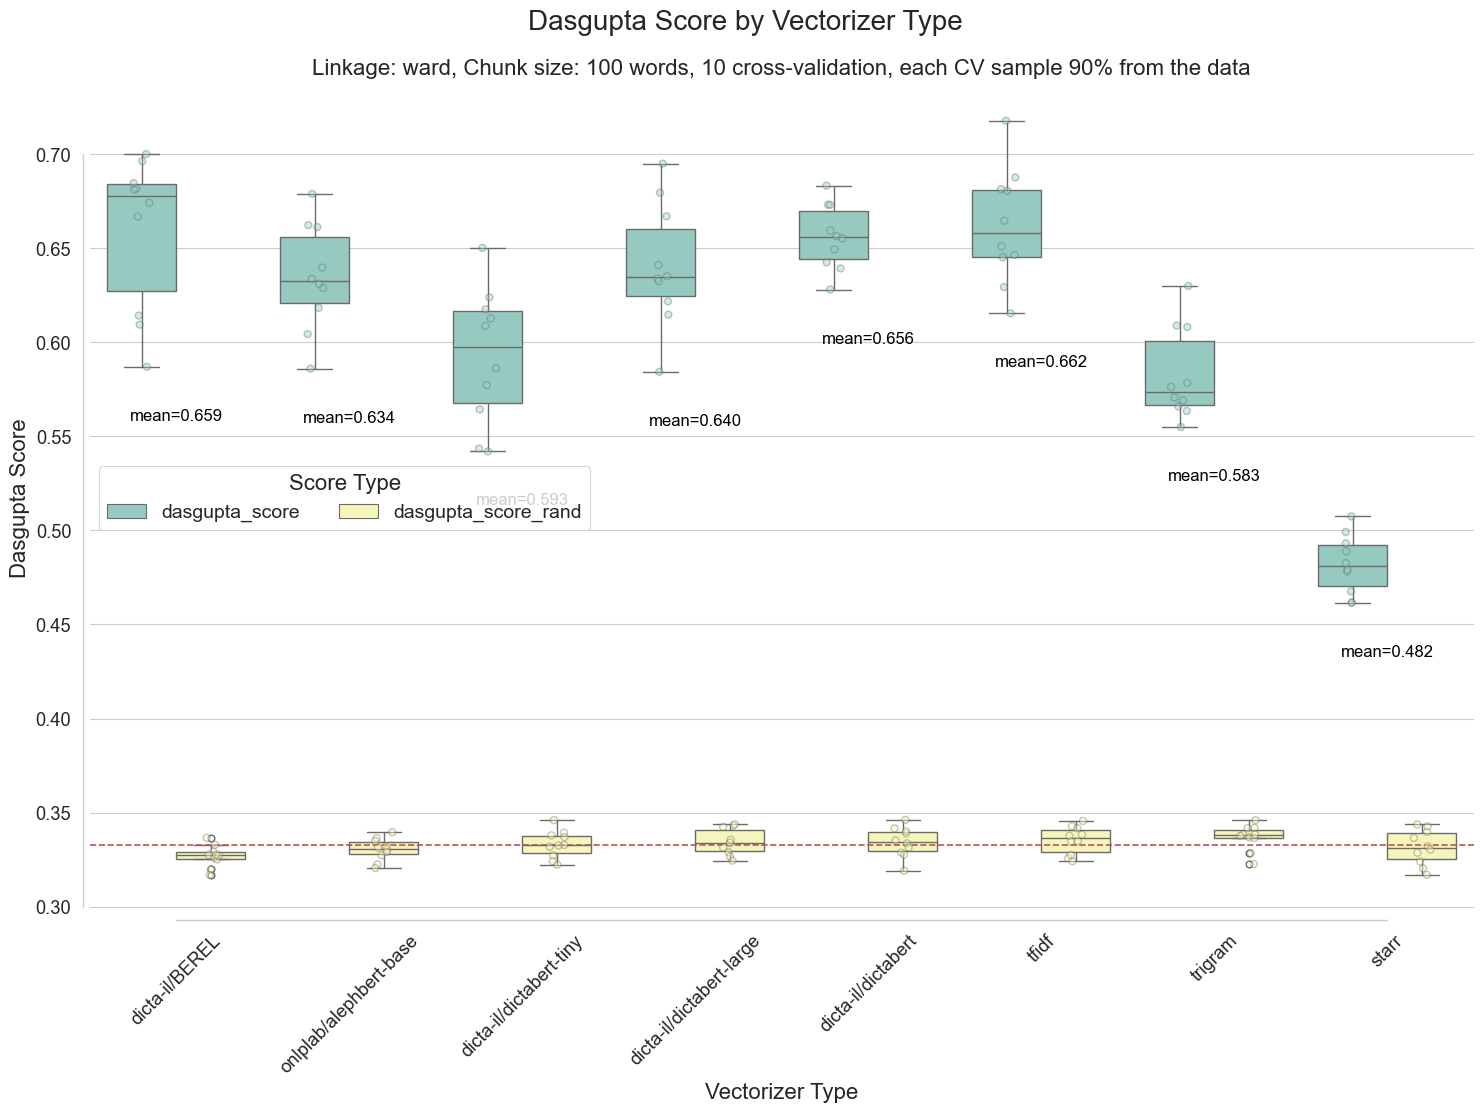

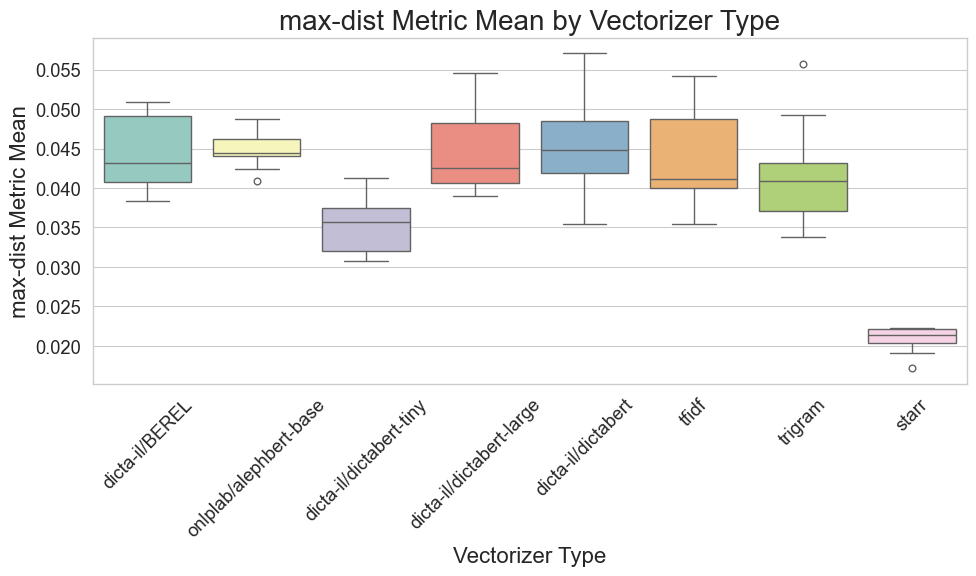

In [13]:
set_seed_globaly()

PATH = f"{BASE_DIR}/notebooks/reports/clustering_baseline"
NUM_CVS = 10
FRAC = 0.9
CONTEXT_SIMILIARITY_WINDOW = 3
vectorizers = BERT_MODELS + ['tfidf', 'trigram', 'starr']
linkage_method = "ward"
file_name = 'dasgupta_scores_window_{}_composition_frac_{}_linkage_{}'.format(CONTEXT_SIMILIARITY_WINDOW,
                                                                              str(FRAC).replace(".", "_"),
                                                                              linkage_method)
if RERUN:
    scores_df = run_clustering_cv(df, FRAC, NUM_CVS, CONTEXT_SIMILIARITY_WINDOW, vectorizers, linkage_method)
    scores_df.to_csv(f"{PATH}/{file_name}.csv", index=False)
else:
    scores_df = pd.read_csv(f"{PATH}/{file_name}.csv")

create_dasgupta_score_plot(scores_df, CHUNK_SIZE, NUM_CVS, FRAC, linkage_method, f"{PATH}/{file_name}",
                           show_p_val=False,
                           p_val_random_test=False, show_mean_scores=True)

create_lca_metric_boxplot(scores_df, f"{PATH}/{file_name}_max_dist")

In [9]:
## example of the adjancy matrix for dasgupta score
# plt.figure(figsize=(12, 10))
# j = 300
# k = 360
# # Create the heatmap with custom labels
# sns.heatmap(adjacency_matrix[j:k, j:k], 
#             xticklabels=sample_names[j:k], 
#             yticklabels=sample_names[j:k], 
#             cmap='viridis')

# # Display the plot
# plt.title(f"Adjacency matrix for dasgupta cost")
# plt.tight_layout()
# plt.show()

In [116]:


def get_clusters_scores(
        df,
        label_name,
        vectorizer_matrix,
        linkage_criterion,
        adjacency_matrix,
        plot=False,
        metadata=None
):
    if sp.issparse(vectorizer_matrix):
        vectorizer_matrix = vectorizer_matrix.toarray()
    sample_names = df[label_name].to_list()
    model = sk.AgglomerativeClustering(
        distance_threshold=0, n_clusters=None, linkage=linkage_criterion
    )
    print(f"{datetime.now()} - fitting AgglomerativeClustering")
    model.fit_predict(vectorizer_matrix)
    # adjacency_matrix = np.zeros((len(sample_names), len(sample_names)))
    # for i in range(0, adjacency_matrix.shape[0] - 1):
    #     adjacency_matrix[i, i + 1] = 1
    #     adjacency_matrix[i + 1, i] = 1
    print(f"{datetime.now()} - getting linkage matrix")
    linkage_matrix = get_linkage_matrix(model)

    print(f"{datetime.now()} - calculate_dasgupta_score")
    score = calculate_dasgupta_score(adjacency_matrix, linkage_matrix)
    if plot:
        matplotlib_dendrogram(linkage_matrix, sample_names, metadata)

    return score, linkage_matrix, model


def run_single_clustering(df, frac, context_similiarity_window, vectorizer_type, linkage_method):
    scores = []
    sampled_df = stratified_sample(df, 'book', frac=frac, random_state=42)
    # sampled_df = df
    # sampled_df["original_index"] = range(len(df))
    print(f"{datetime.now()} - {sampled_df.shape=}")
    adjacency_matrix = create_adjacency_matrix(sampled_df, context_similiarity_window=context_similiarity_window,
                                               composition_level=True)


    vectorizer_matrix = vectorize_text(sampled_df, "text", vectorizer_type)
    print(f"{datetime.now()} - {vectorizer_type=},{vectorizer_matrix.shape=}")

    dasgupta_score, linkage_matrix, model = get_clusters_scores(sampled_df, "sentence_path", vectorizer_matrix,
                                                         linkage_method, adjacency_matrix, plot=False,
                                                         metadata={"vectorizer_type": vectorizer_type})
    
    print(f"{dasgupta_score=}\n")

    feature_order = get_dendrogram_feature_order(linkage_matrix, df["sentence_path"].to_list())
    # _, LCA_metric_mean, LCA_metric_std = get_metrics_from_LCA(feature_order)

    scores.append({"vectorizer": vectorizer_type, "dasgupta_score": dasgupta_score})

    # Convert scores to a DataFrame for easier analysis
    scores_df = pd.DataFrame(scores)
    return scores_df, linkage_matrix, sampled_df, vectorizer_matrix, feature_order,model

scores_df, linkage_matrix, sampled_df, vectorizer_matrix, feature_order, model = run_single_clustering(df, frac=0.1, context_similiarity_window=3, vectorizer_type="tfidf", linkage_method="ward")

2024-06-19 08:09:51.423815 - sampled_df.shape=(138, 26)


Building adjacency matrix:   0%|          | 0/138 [00:00<?, ?it/s]

2024-06-19 08:09:51.486895 - vectorizer_type='tfidf',vectorizer_matrix.shape=(138, 4209)
2024-06-19 08:09:51.508568 - fitting AgglomerativeClustering
2024-06-19 08:09:51.557867 - getting linkage matrix
2024-06-19 08:09:51.558337 - calculate_dasgupta_score
dasgupta_score=0.6056962361310188



In [117]:
# Create a recursive function to build the hierarchical structure
def build_tree(node, children, names):
    if node < len(names):
        return {"name": names[node], "value": 1}
    else:
        node_children = children[node - len(names)]
        return {
            "name": f"node_{node}",
            "children": [build_tree(child, children, names) for child in node_children]
        }

# Extract children from the model
n_samples = len(model.labels_)
children = model.children_

# Use the real labels from df["sentence_path"]
names = sampled_df["sentence_path"].apply(shorten_path).tolist()

# Build the hierarchical tree starting from the root node
root_node = n_samples + len(children) - 1
tree = build_tree(root_node, children, names)
tree

{'name': 'node_274',
 'children': [{'name': 'node_266',
   'children': [{'name': 'node_261',
     'children': [{'name': 'node_247',
       'children': [{'name': 'node_203',
         'children': [{'name': '1QHa:2-3', 'value': 1},
          {'name': 'node_170',
           'children': [{'name': '1QHa:9-9', 'value': 1},
            {'name': '1QHa:19-19', 'value': 1}]}]},
        {'name': 'node_237',
         'children': [{'name': 'node_152',
           'children': [{'name': '1QHa:10-10', 'value': 1},
            {'name': '1QHa:13-13', 'value': 1}]},
          {'name': 'node_215',
           'children': [{'name': '4Q509:f131_132i-f133', 'value': 1},
            {'name': 'node_191',
             'children': [{'name': '1QHa:13-13', 'value': 1},
              {'name': '1QHa:16-16', 'value': 1}]}]}]}]},
      {'name': 'node_260',
       'children': [{'name': 'node_201',
         'children': [{'name': '4Q405:f1-f3ii', 'value': 1},
          {'name': 'node_150',
           'children': [{'name': '

In [118]:
import json
# !pip install anytree
from anytree import PostOrderIter
from anytree.importer import DictImporter
import ipywidgets as widgets
import plotly.graph_objs as go
import pandas as pd

In [136]:
# Create a recursive function to build the hierarchical structure
def build_tree(node, children, names):
    if node < len(names):
        return {"name": names[node], "value": 1}
    else:
        node_children = children[node - len(names)]
        return {
            "name": f"node_{node}",
            "children": [build_tree(child, children, names) for child in node_children]
        }

# Extract children from the model
n_samples = len(model.labels_)
children = model.children_

# Use the real labels from df["sentence_path"]
names = sampled_df["sentence_path"].apply(shorten_path).tolist()

# Build the hierarchical tree starting from the root node
root_node = n_samples + len(children) - 1
tree = build_tree(root_node, children, names)
tree

importer = DictImporter()
root = importer.import_(tree)

size = []
name = []
parent = []
level = []

def format(node):
  for i in node.children:
    #check if node as attribute value
    if hasattr(i, 'value') == False:
      format(i)
    v = i.value
    #check if node parent as attribute value
    if hasattr(i.parent, 'value'):
      i.parent.value += v
    #if node parent doesn't have a value set to same val as child
    elif hasattr(i.parent, 'value')== False:
      i.parent.value = v

    level.append(len(i.ancestors))
    name.append(i.name)
    parent.append(i.parent.name)
    size.append(i.value)
    
format(root)


In [137]:
import plotly
import json
# !pip install anytree
from anytree import PostOrderIter
from anytree.importer import DictImporter
import ipywidgets as widgets
import plotly.graph_objs as go
import pandas as pd
# Create a recursive function to build the hierarchical structure
def build_tree(node, children, names):
    if node < len(names):
        return {"name": names[node], "value": 1}
    else:
        node_children = children[node - len(names)]
        return {
            "name": f"node_{node}",
            "children": [build_tree(child, children, names) for child in node_children]
        }

# Extract children from the model
n_samples = len(model.labels_)
children = model.children_

# Use the real labels from df["sentence_path"]
names = sampled_df["sentence_path"].apply(shorten_path).tolist()

# Build the hierarchical tree starting from the root node
root_node = n_samples + len(children) - 1
tree = build_tree(root_node, children, names)
tree

importer = DictImporter()
root = importer.import_(tree)

size = []
name = []
parent = []
level = []

def format(node):
  for i in node.children:
    #check if node as attribute value
    if hasattr(i, 'value') == False:
      format(i)
    v = i.value
    #check if node parent as attribute value
    if hasattr(i.parent, 'value'):
      i.parent.value += v
    #if node parent doesn't have a value set to same val as child
    elif hasattr(i.parent, 'value')== False:
      i.parent.value = v

    level.append(len(i.ancestors))
    name.append(i.name)
    parent.append(i.parent.name)
    size.append(i.value)
    
format(root)



#append attributes for root
level.append(0)
name.append(root.name)
parent.append("")
size.append(root.value)

#create df
df_plotly = pd.DataFrame()
df_plotly['parent'] = parent
df_plotly['name'] = name
df_plotly['value']= size
df_plotly['level'] = level

#slider funtion
def update(sliderVal):
  fig = plotly.graph_objs.Figure()
  fig.add_trace(plotly.graph_objs.Treemap(
      labels = df_plotly[df_plotly['level']<sliderVal]['name'],
      values = df_plotly[df_plotly['level']<sliderVal]['value'],
      parents = df_plotly[df_plotly['level']<sliderVal]['parent']  
  ))
  fig.update_traces(root_color="#f1f1f1")
  fig.update_layout(width = 900, height = 1800)
  fig.show()

#create slider widget
widgets.interact(update, sliderVal = (0, df_plotly["level"].nunique()))

In [139]:
import plotly
import json
from anytree import PostOrderIter, DictImporter
import ipywidgets as widgets
import plotly.graph_objs as go
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Create a recursive function to build the hierarchical structure
def build_tree(node, children, names):
    if node < len(names):
        return {"name": names[node], "value": 1}
    else:
        node_children = children[node - len(names)]
        return {
            "name": f"node_{node}",
            "children": [build_tree(child, children, names) for child in node_children]
        }

# Function to format and calculate values for nodes
def format_tree(root):
    for node in PostOrderIter(root):
        if not hasattr(node, 'value'):
            node.value = sum(child.value for child in node.children)
        if node.parent:
            if not hasattr(node.parent, 'value'):
                node.parent.value = 0
            node.parent.value += node.value
        level.append(len(node.ancestors))
        name.append(node.name)
        parent.append(node.parent.name if node.parent else "")
        size.append(node.value)

n_samples = len(model.labels_)
children = model.children_
names = df_sampled["sentence_path"].tolist()

# Build the hierarchical tree
root_node = n_samples + len(children) - 1
tree = build_tree(root_node, children, names)

# Import the tree using anytree
importer = DictImporter()
root = importer.import_(tree)

# Initialize lists for tree attributes
size, name, parent, level = [], [], [], []

# Format the tree and calculate node values
format_tree(root)

# Append attributes for root
level.append(0)
name.append(root.name)
parent.append("")
size.append(root.value)

# Create DataFrame for Plotly
df_plotly = pd.DataFrame({
    'parent': parent,
    'name': name,
    'value': size,
    'level': level
})

# Slider function to update the plot
def update(sliderVal):
    fig = go.Figure(go.Treemap(
        labels=df_plotly[df_plotly['level'] < sliderVal]['name'],
        values=df_plotly[df_plotly['level'] < sliderVal]['value'],
        parents=df_plotly[df_plotly['level'] < sliderVal]['parent']
    ))
    fig.update_traces(root_color="#f1f1f1")
    fig.update_layout(
        width=900,
        height=1800,
        title='Hierarchical Clustering Treemap',
        treemapcolorway=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52'],
        margin=dict(t=50, l=25, r=25, b=25)
    )
    fig.show()

# Create slider widget
widgets.interact(update, sliderVal=(0, df_plotly["level"].nunique()))

ImportError: cannot import name 'DictImporter' from 'anytree' (/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/anytree/__init__.py)

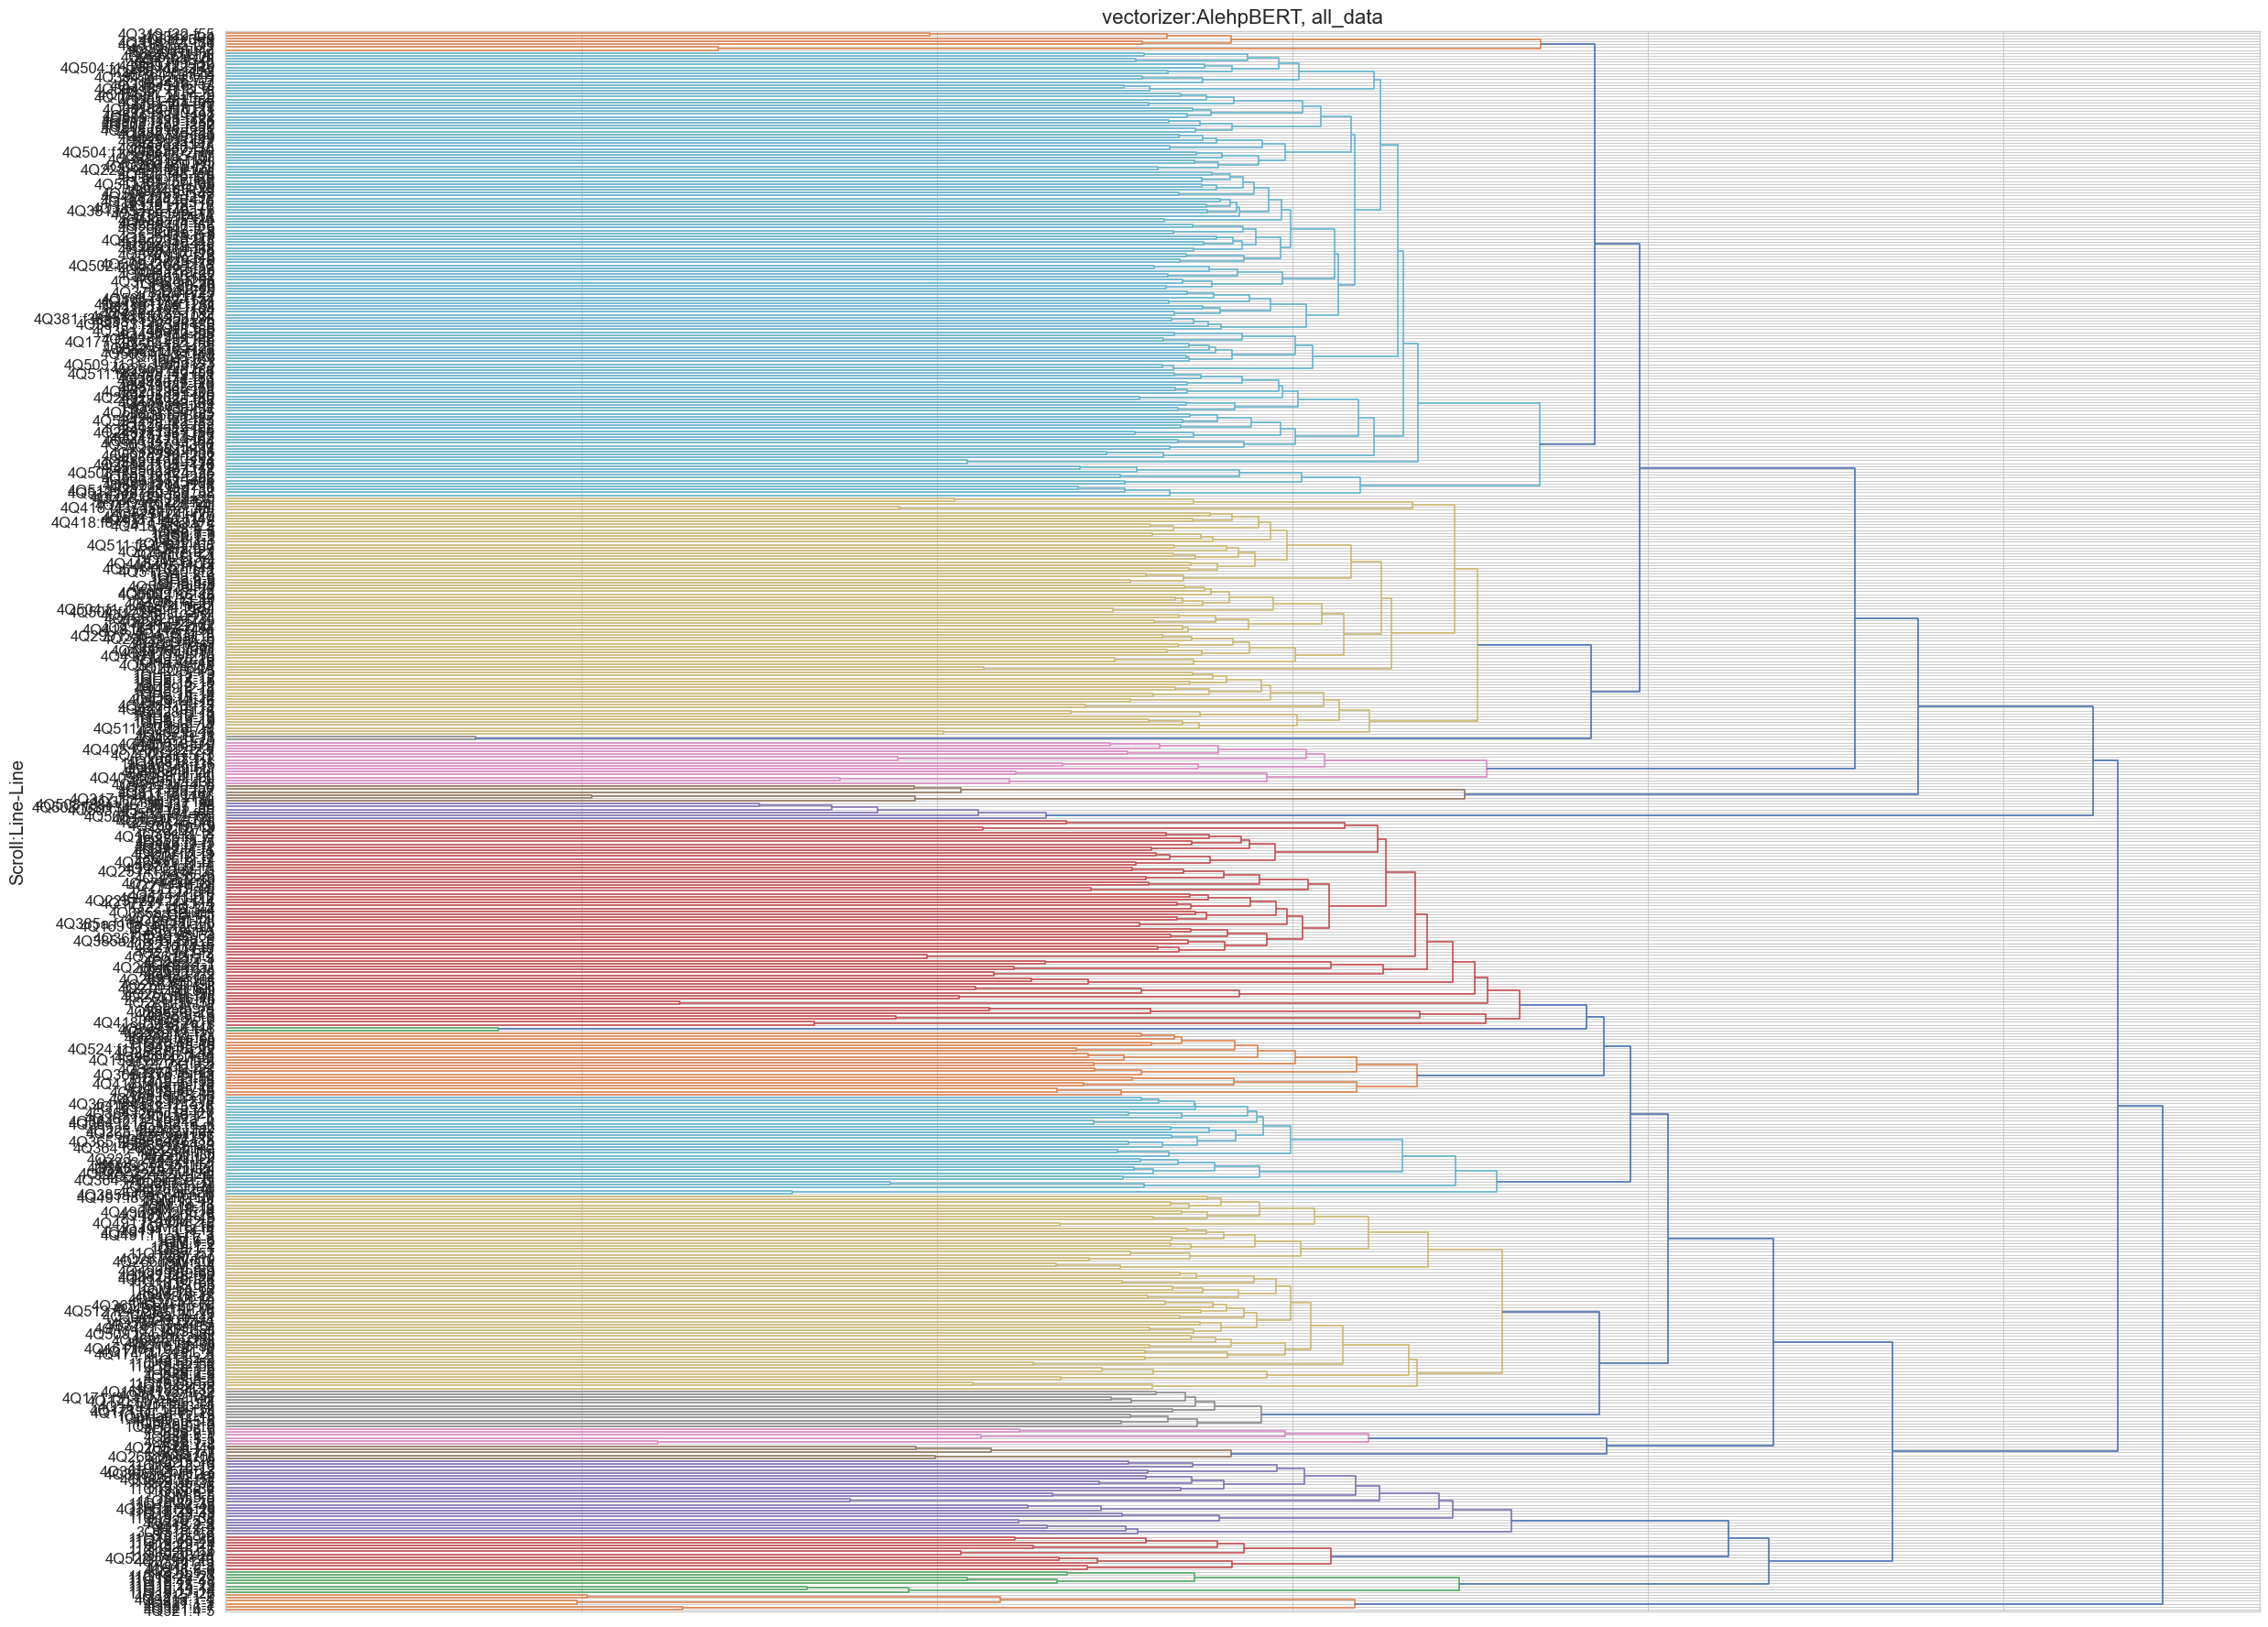

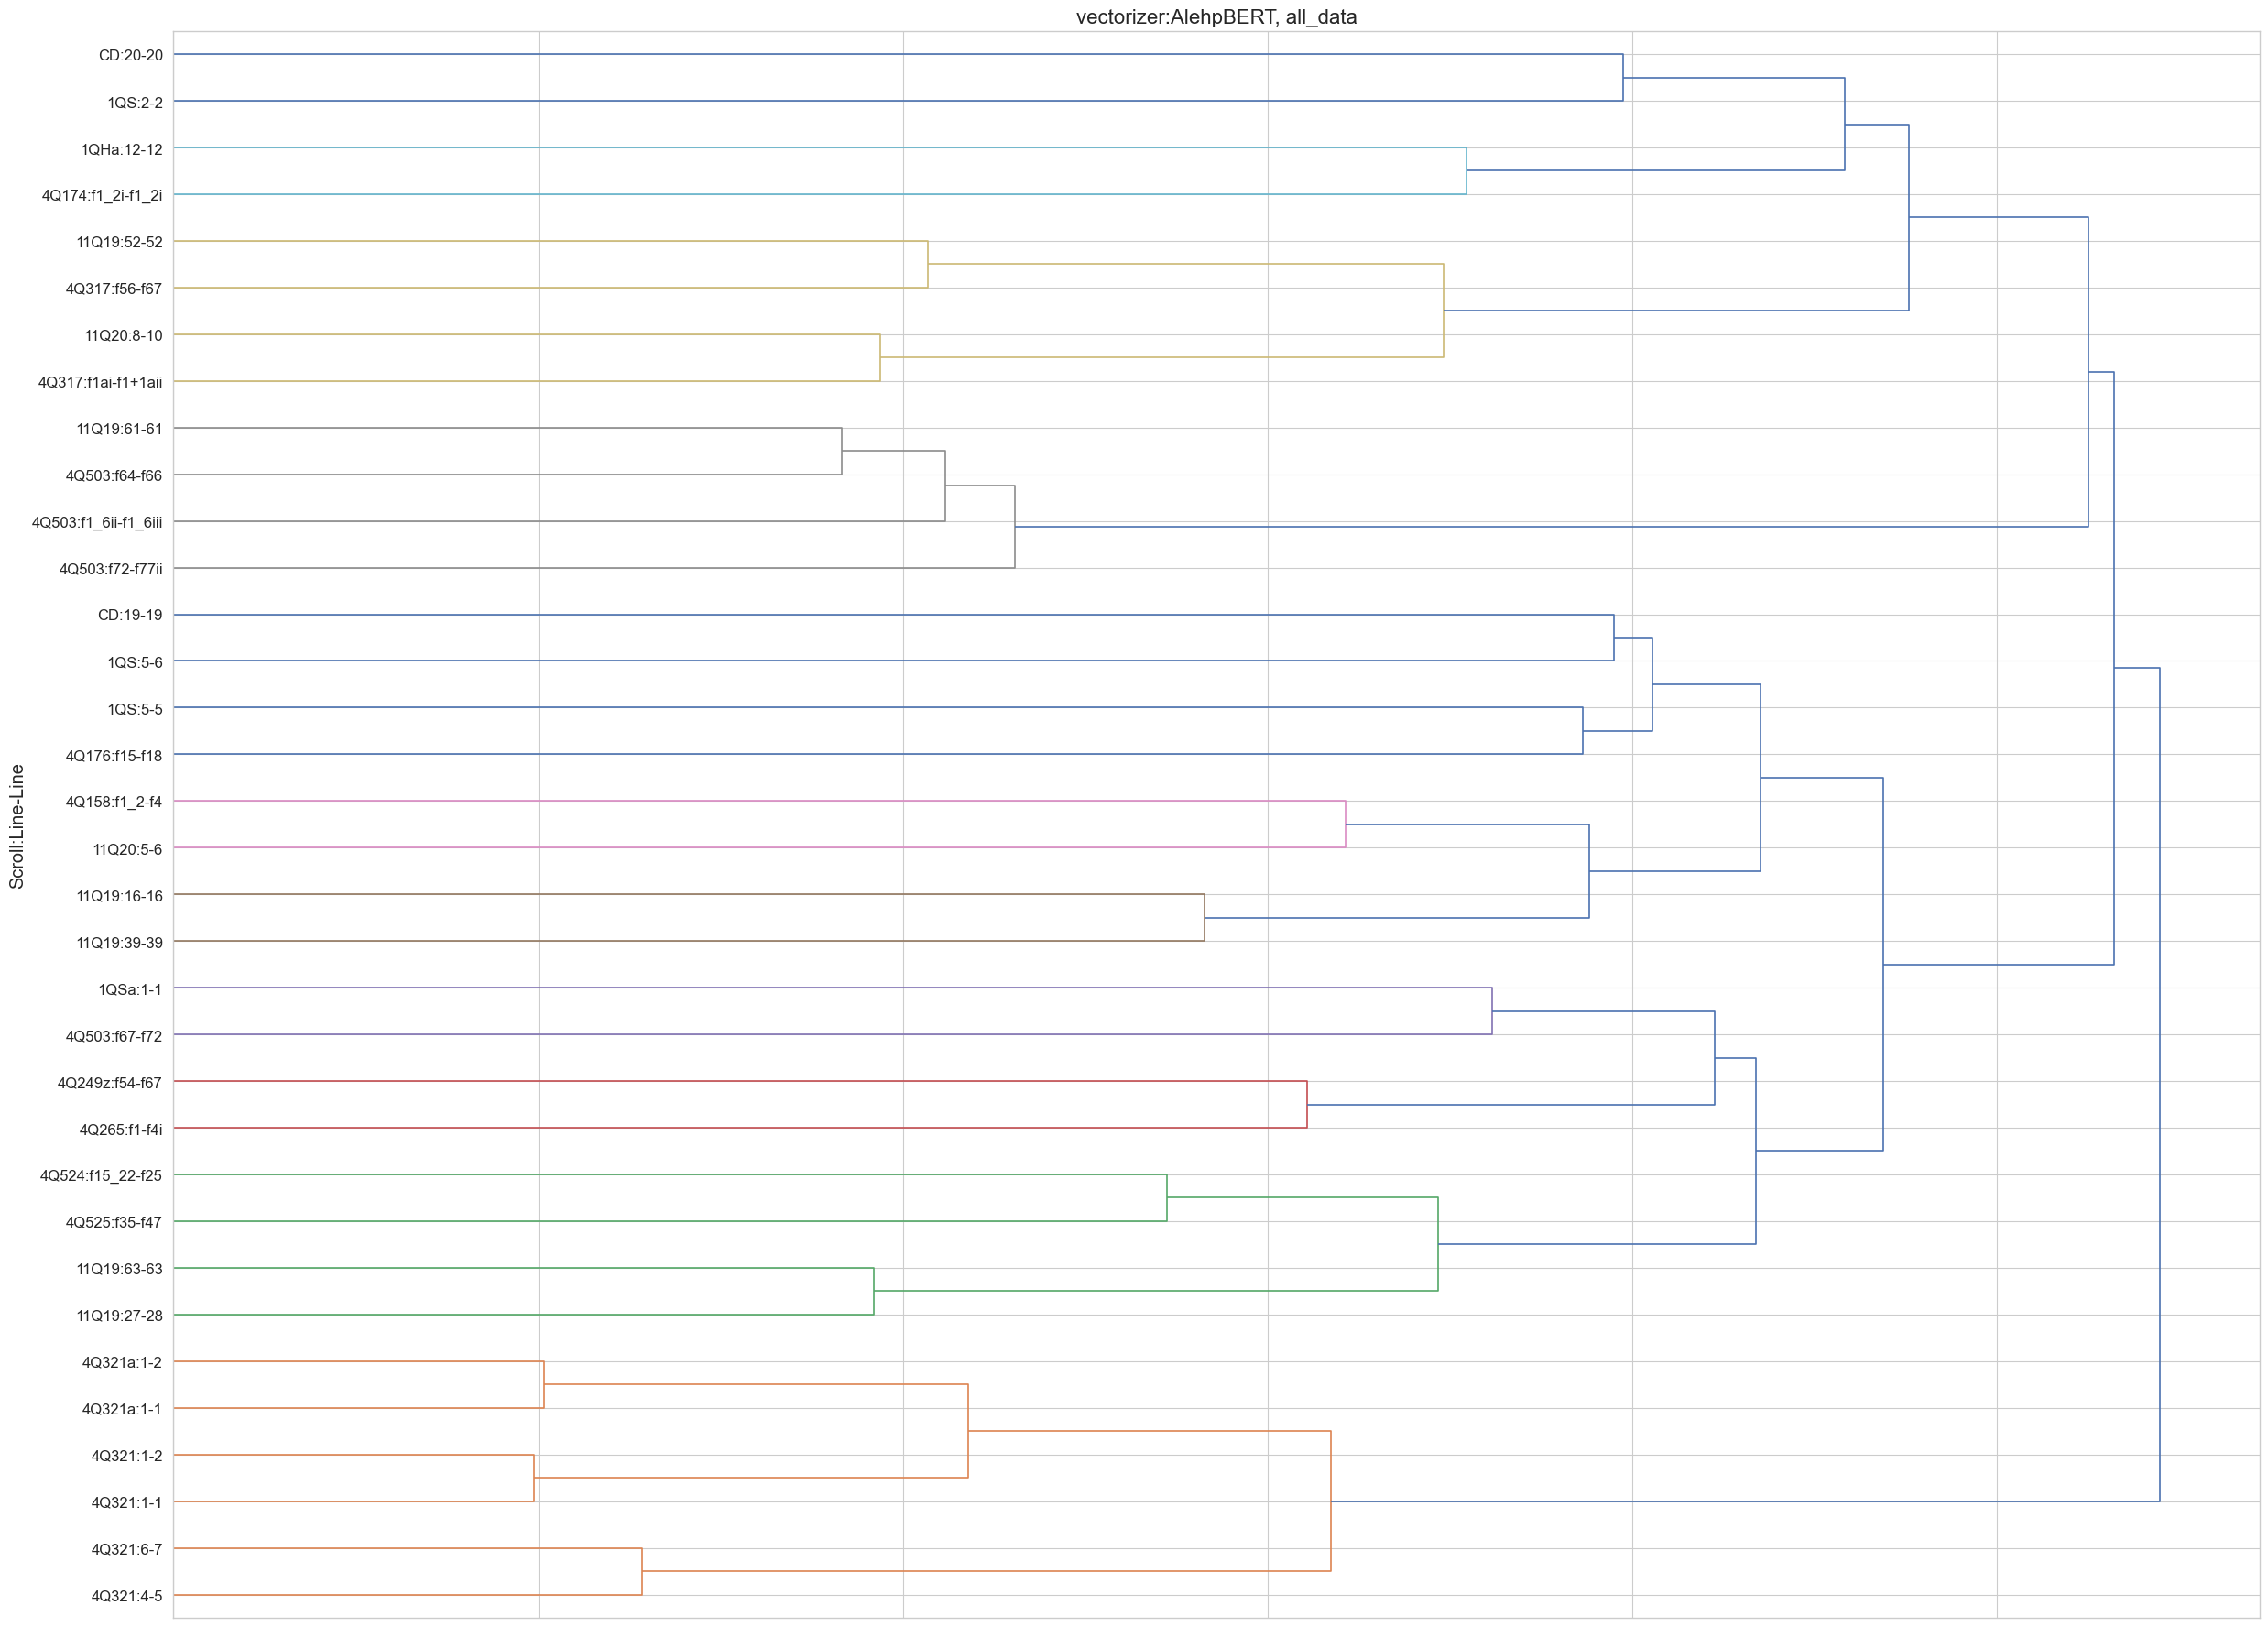

In [66]:
path_to_image = f"{BASE_DIR}/notebooks/data/test"
def llf(id):
    if id < len(sample_names):
        return sample_names[id]
    else:
        return f'{sample_names[len(sample_names)-id]}'
def matplotlib_dendrogram(linkage_matrix, sample_names, title, level = None, metadata=None):
    plt.figure(figsize=(25, 18))
    
    dendrogram(
        linkage_matrix,
        leaf_label_func=llf,
        orientation="right",
     
        color_threshold=0.7 * max(linkage_matrix[:, 2]),  # Adjust color threshold,
        truncate_mode = "level" if level else level,
        p=30 if not level else level
    )

    plt.title(f'vectorizer:{metadata["vectorizer_type"]}, all_data', fontsize=16)
    plt.ylabel("Scroll:Line-Line")
    plt.tick_params(
        axis="x",  # changes apply to the x-axis
        which="both",  # both major and minor ticks are affected
        bottom=False,  # ticks along the bottom edge are off
        top=False,  # ticks along the top edge are off
        labelbottom=False,
    )
    plt.tick_params(
        axis="y",  # changes apply to the x-axis
        which="both",  # both major and minor ticks are affected,
        labelsize=12,
    )
    plt.tight_layout()
    # full_image_path = (f"{path_to_image}/{title}{metadata['vectorizer_type']}_{title}.png")
    # print(f"saved: {path_to_image}/_{title}{metadata['vectorizer_type']}.png")
    # plt.savefig(full_image_path)
    plt.show()

    

sample_names = sampled_df["sentence_path"].apply(shorten_path).to_list()
matplotlib_dendrogram(linkage_matrix, sample_names, level= None, title="full_dendogram", metadata={"vectorizer_type":"AlehpBERT"} )
matplotlib_dendrogram(linkage_matrix, sample_names, level= 5, title="dendogram_level_5", metadata={"vectorizer_type":"AlehpBERT"} )

In [46]:
import matplotlib.pyplot as plt
import squarify
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
import plotly.express as px

sampled_df = stratified_sample(df, 'book', frac=0.5, random_state=42)
vectorizer_type = "tfidf"
vectorizer_matrix = vectorize_text(sampled_df, "text", vectorizer_type)
sample_names = sampled_df["sentence_path"].apply(shorten_path).to_list()


array([[2.96000000e+02, 2.97000000e+02, 2.87211347e-01, 2.00000000e+00],
       [1.16000000e+02, 4.74000000e+02, 3.46898106e-01, 2.00000000e+00],
       [2.43000000e+02, 2.56000000e+02, 3.83333112e-01, 2.00000000e+00],
       ...,
       [1.35800000e+03, 1.35900000e+03, 2.93104004e+00, 6.65000000e+02],
       [7.91000000e+02, 1.33400000e+03, 3.01487244e+00, 1.70000000e+01],
       [1.36000000e+03, 1.36100000e+03, 3.05703635e+00, 6.82000000e+02]])

In [67]:

# Perform hierarchical clustering
# linkage_matrix = linkage(vectorizer_matrix.toarray(), method='ward')  # Replace 'vectorizer_matrix' with your actual data

# Generate cluster assignments
max_d = 0.6 * max(linkage_matrix[:, 2])
clusters = fcluster(linkage_matrix, max_d, criterion='distance')

# Create a DataFrame for Plotly
df__ = pd.DataFrame({
    'sample_name': sample_names,
    'cluster': clusters
})

len(set(clusters))

50

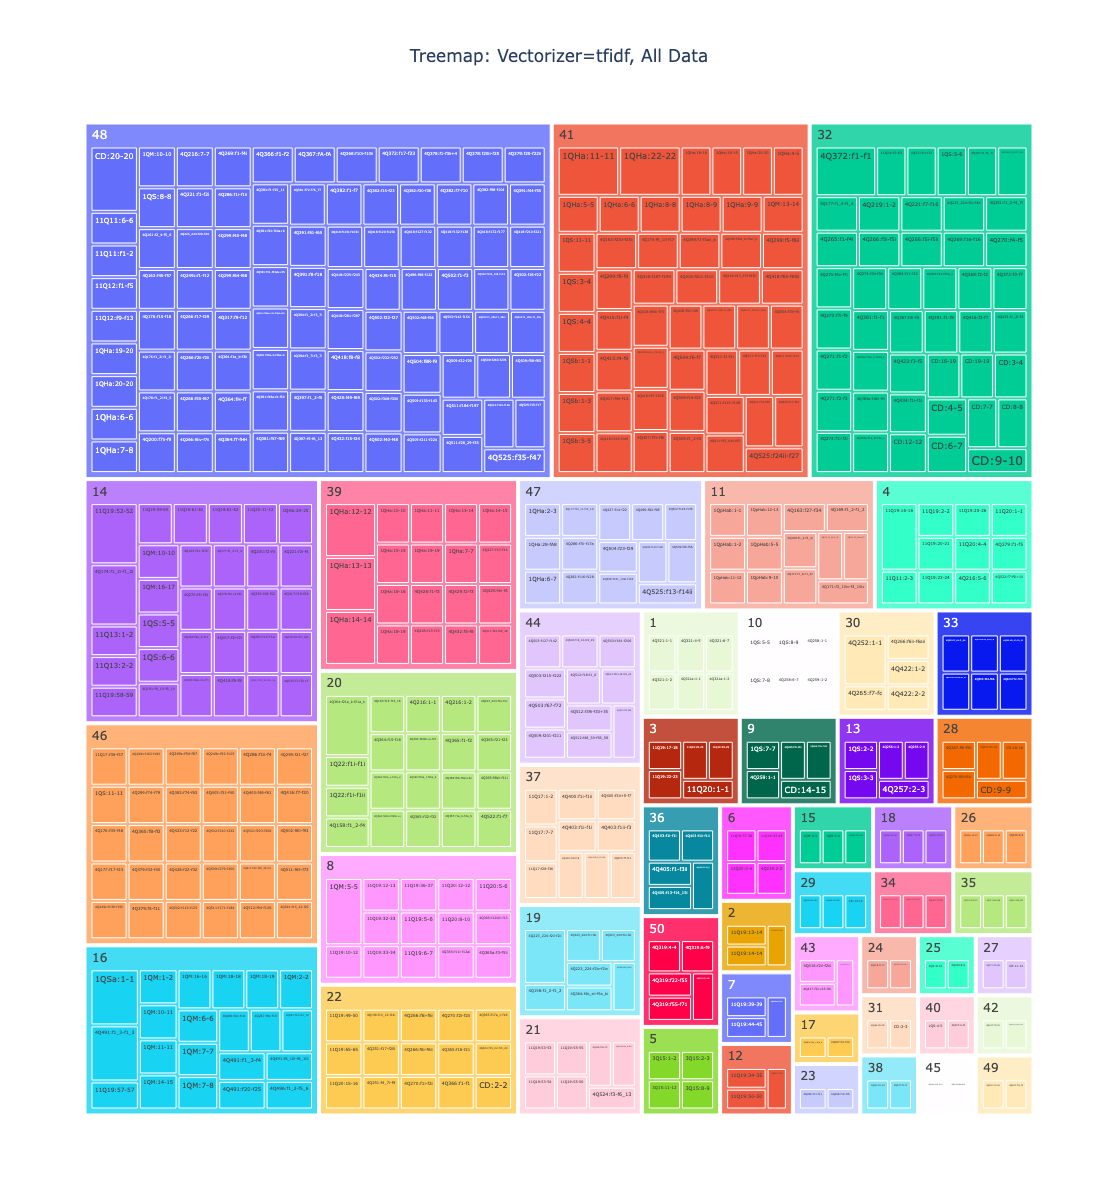

In [68]:

# Create a treemap
fig = px.treemap(df__, path=['cluster', 'sample_name'], values=np.ones(len(df__)), 
                 title=f'Treemap: Vectorizer={vectorizer_type}, All Data')
factor = 0.6
fig.update_layout(
    width=1900*factor,
    height=2000*factor,
    title={
        'text': f'Treemap: Vectorizer={vectorizer_type}, All Data',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
# Show the treemap
fig.show()


In [69]:
model.children_

array([[  92,  378],
       [ 194,  203],
       [ 243,  244],
       ...,
       [ 599, 1081],
       [1080, 1082],
       [1018, 1083]])

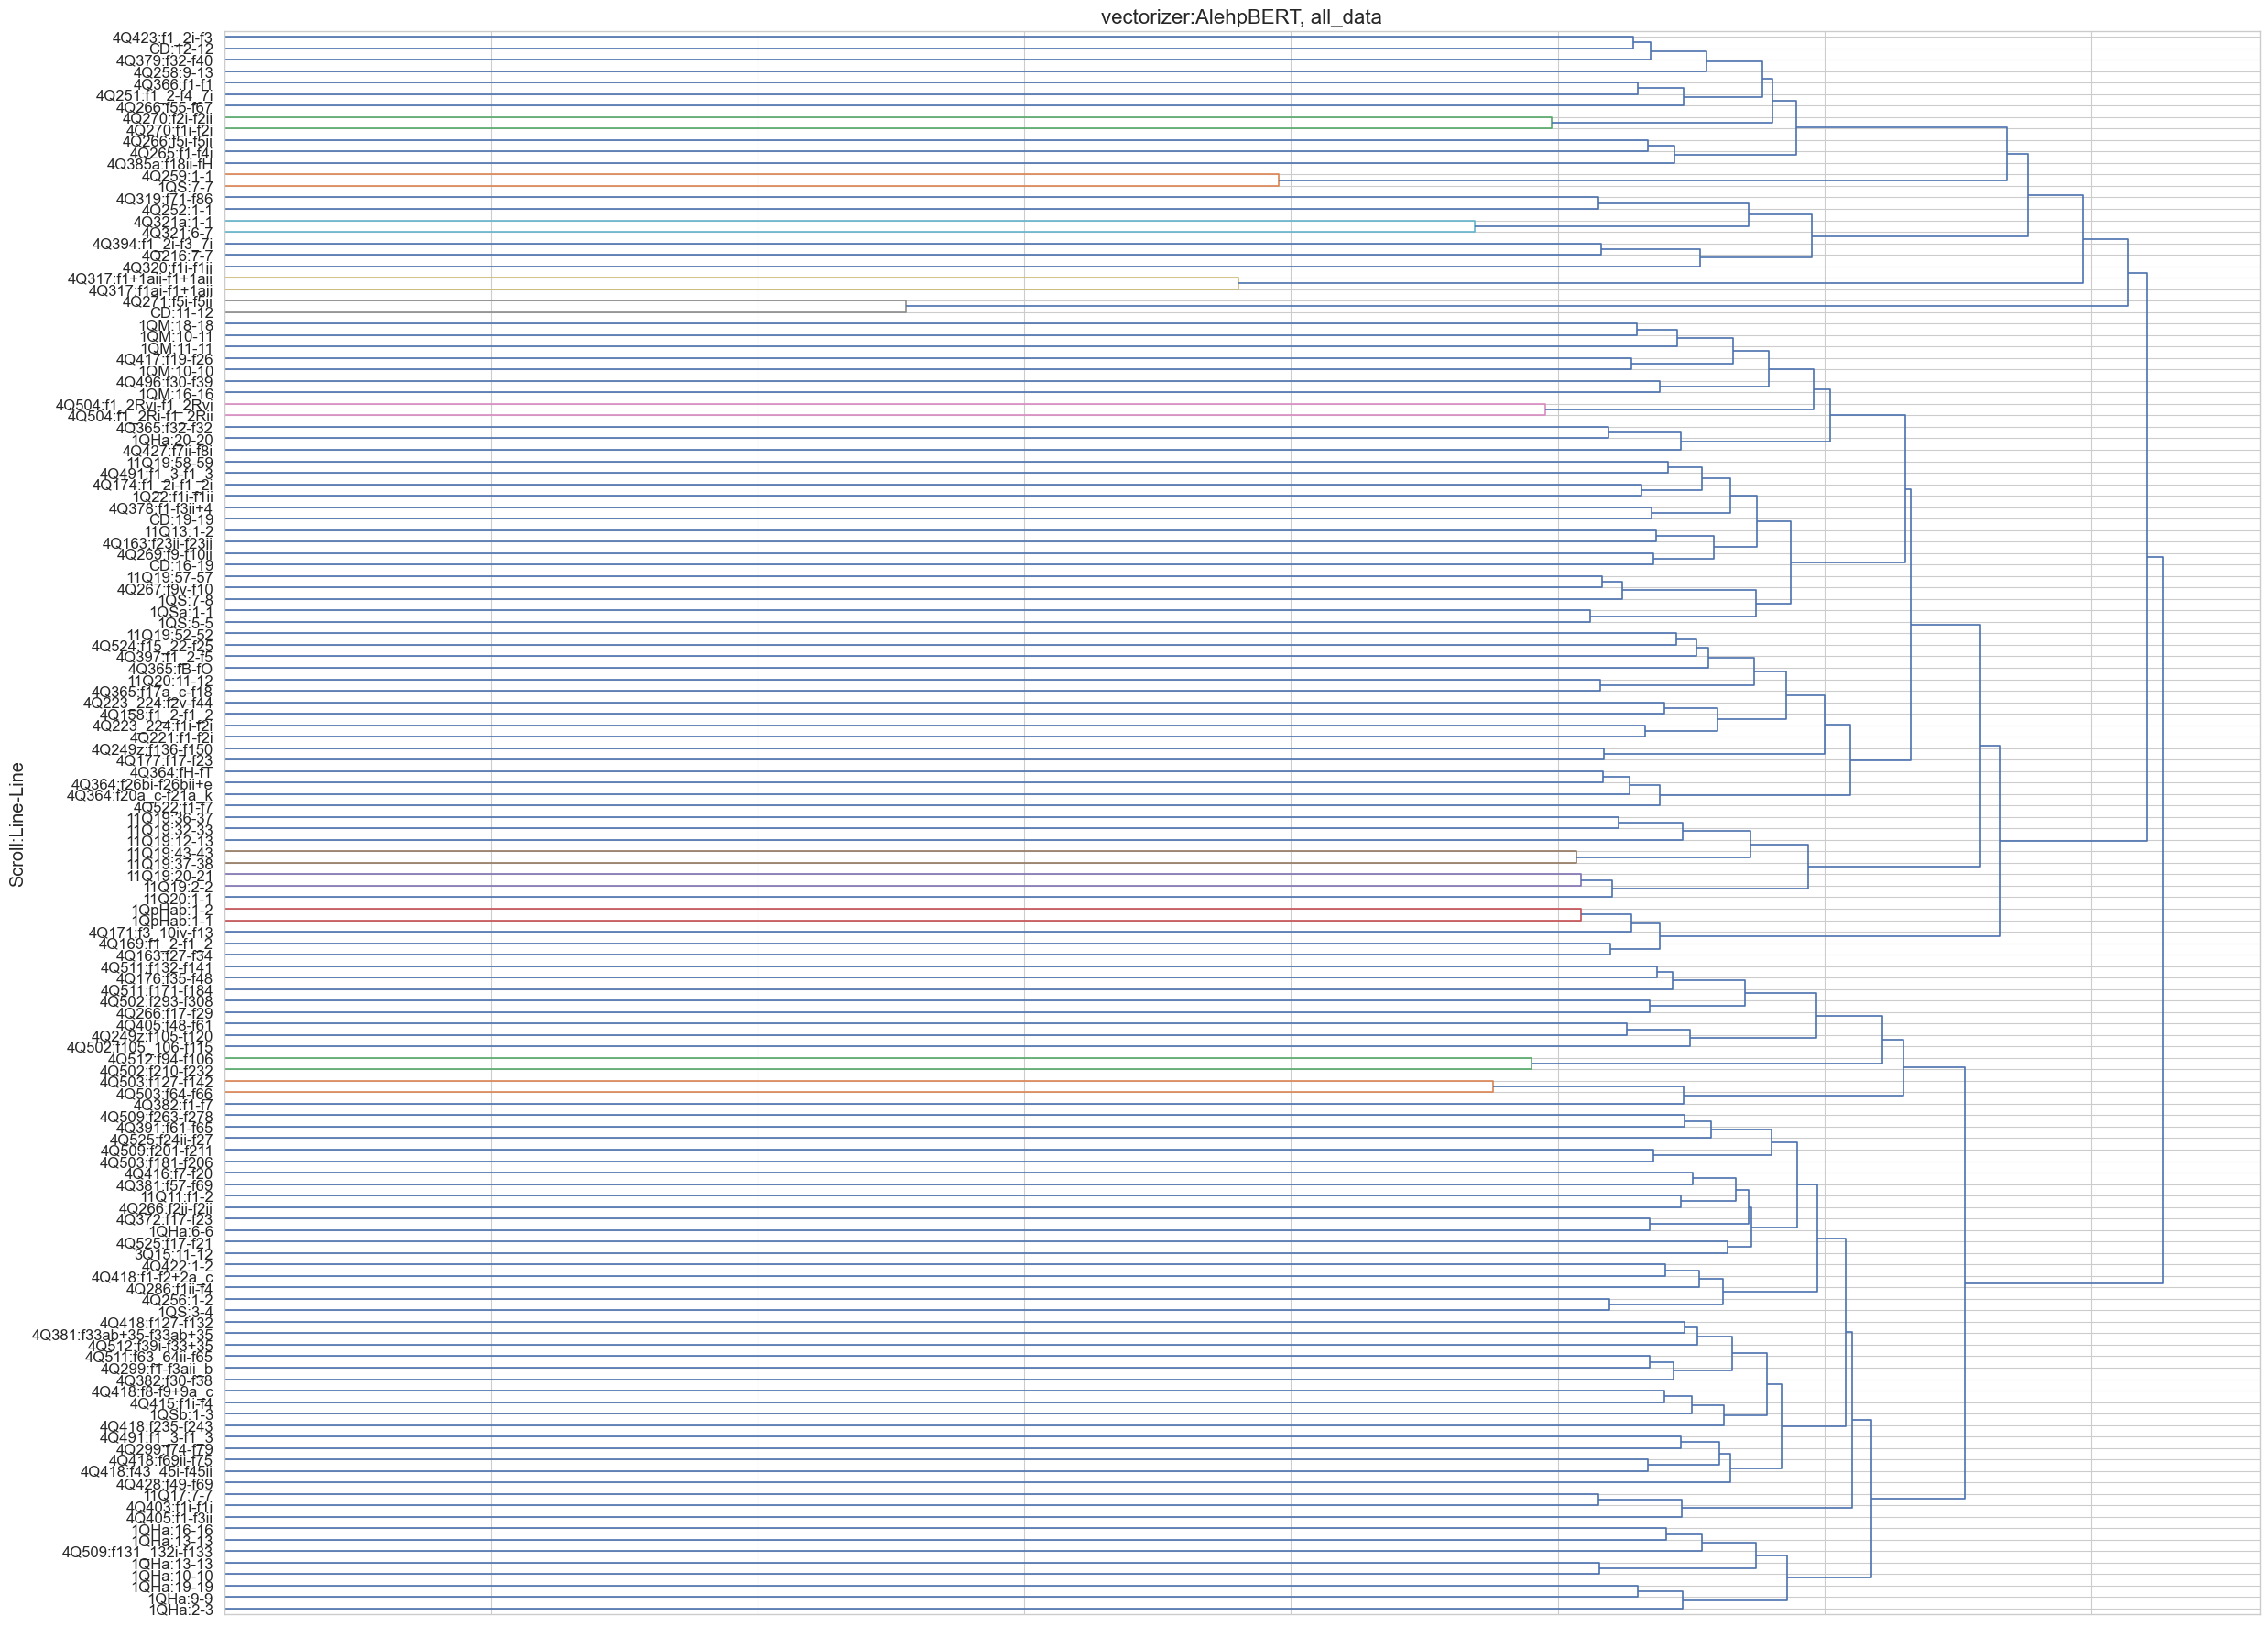

In [45]:
matplotlib_dendrogram(linkage_matrix, sample_names, level= None, title="full_dendogram", metadata={"vectorizer_type":"AlehpBERT"} )

TODO:

1. See if im doing bert the right way/ compare other models. https://huggingface.co/docs/transformers/en/autoclass_tutorial
2. Understand dgapudsta score
3. More plots to understand how good our clustering is




In [10]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


def cluster_data(data, num_clusters=5, random_state=42):
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
    clusters = kmeans.fit_predict(data)
    return clusters


def plot_tsne(data, clusters, clustering_labels, random_state=42, metadata=None):
    tsne = TSNE(n_components=2, random_state=random_state, perplexity=40)
    if type(data) != np.ndarray:
        data = data.toarray()
    tsne_results = tsne.fit_transform(data)
    tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
    tsne_df['Cluster'] = clusters
    tsne_df['Cluster'] = tsne_df['Cluster'].astype(str)

    plt.figure(figsize=(30, 20))
    sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='pastel', data=tsne_df)

    for i, text in enumerate(clustering_labels):
        plt.text(tsne_df.loc[i, "TSNE1"], tsne_df.loc[i, "TSNE2"], text,
                 fontdict=dict(color='black', size=10), ha='right')
    plt.title(
        f't-SNE Clustering, vectorizer_type:{metadata.get("vectorizer_type")}, Frac from data: {metadata.get("frac")}')
    plt.show()


FRAC = 0.25
vectorizer_type = "tfidf"
sampled_df = stratified_sample(df, 'book', frac=FRAC, random_state=42)
vectorizer_matrix = vectorize_text(sampled_df, "text", vectorizer_type)


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 

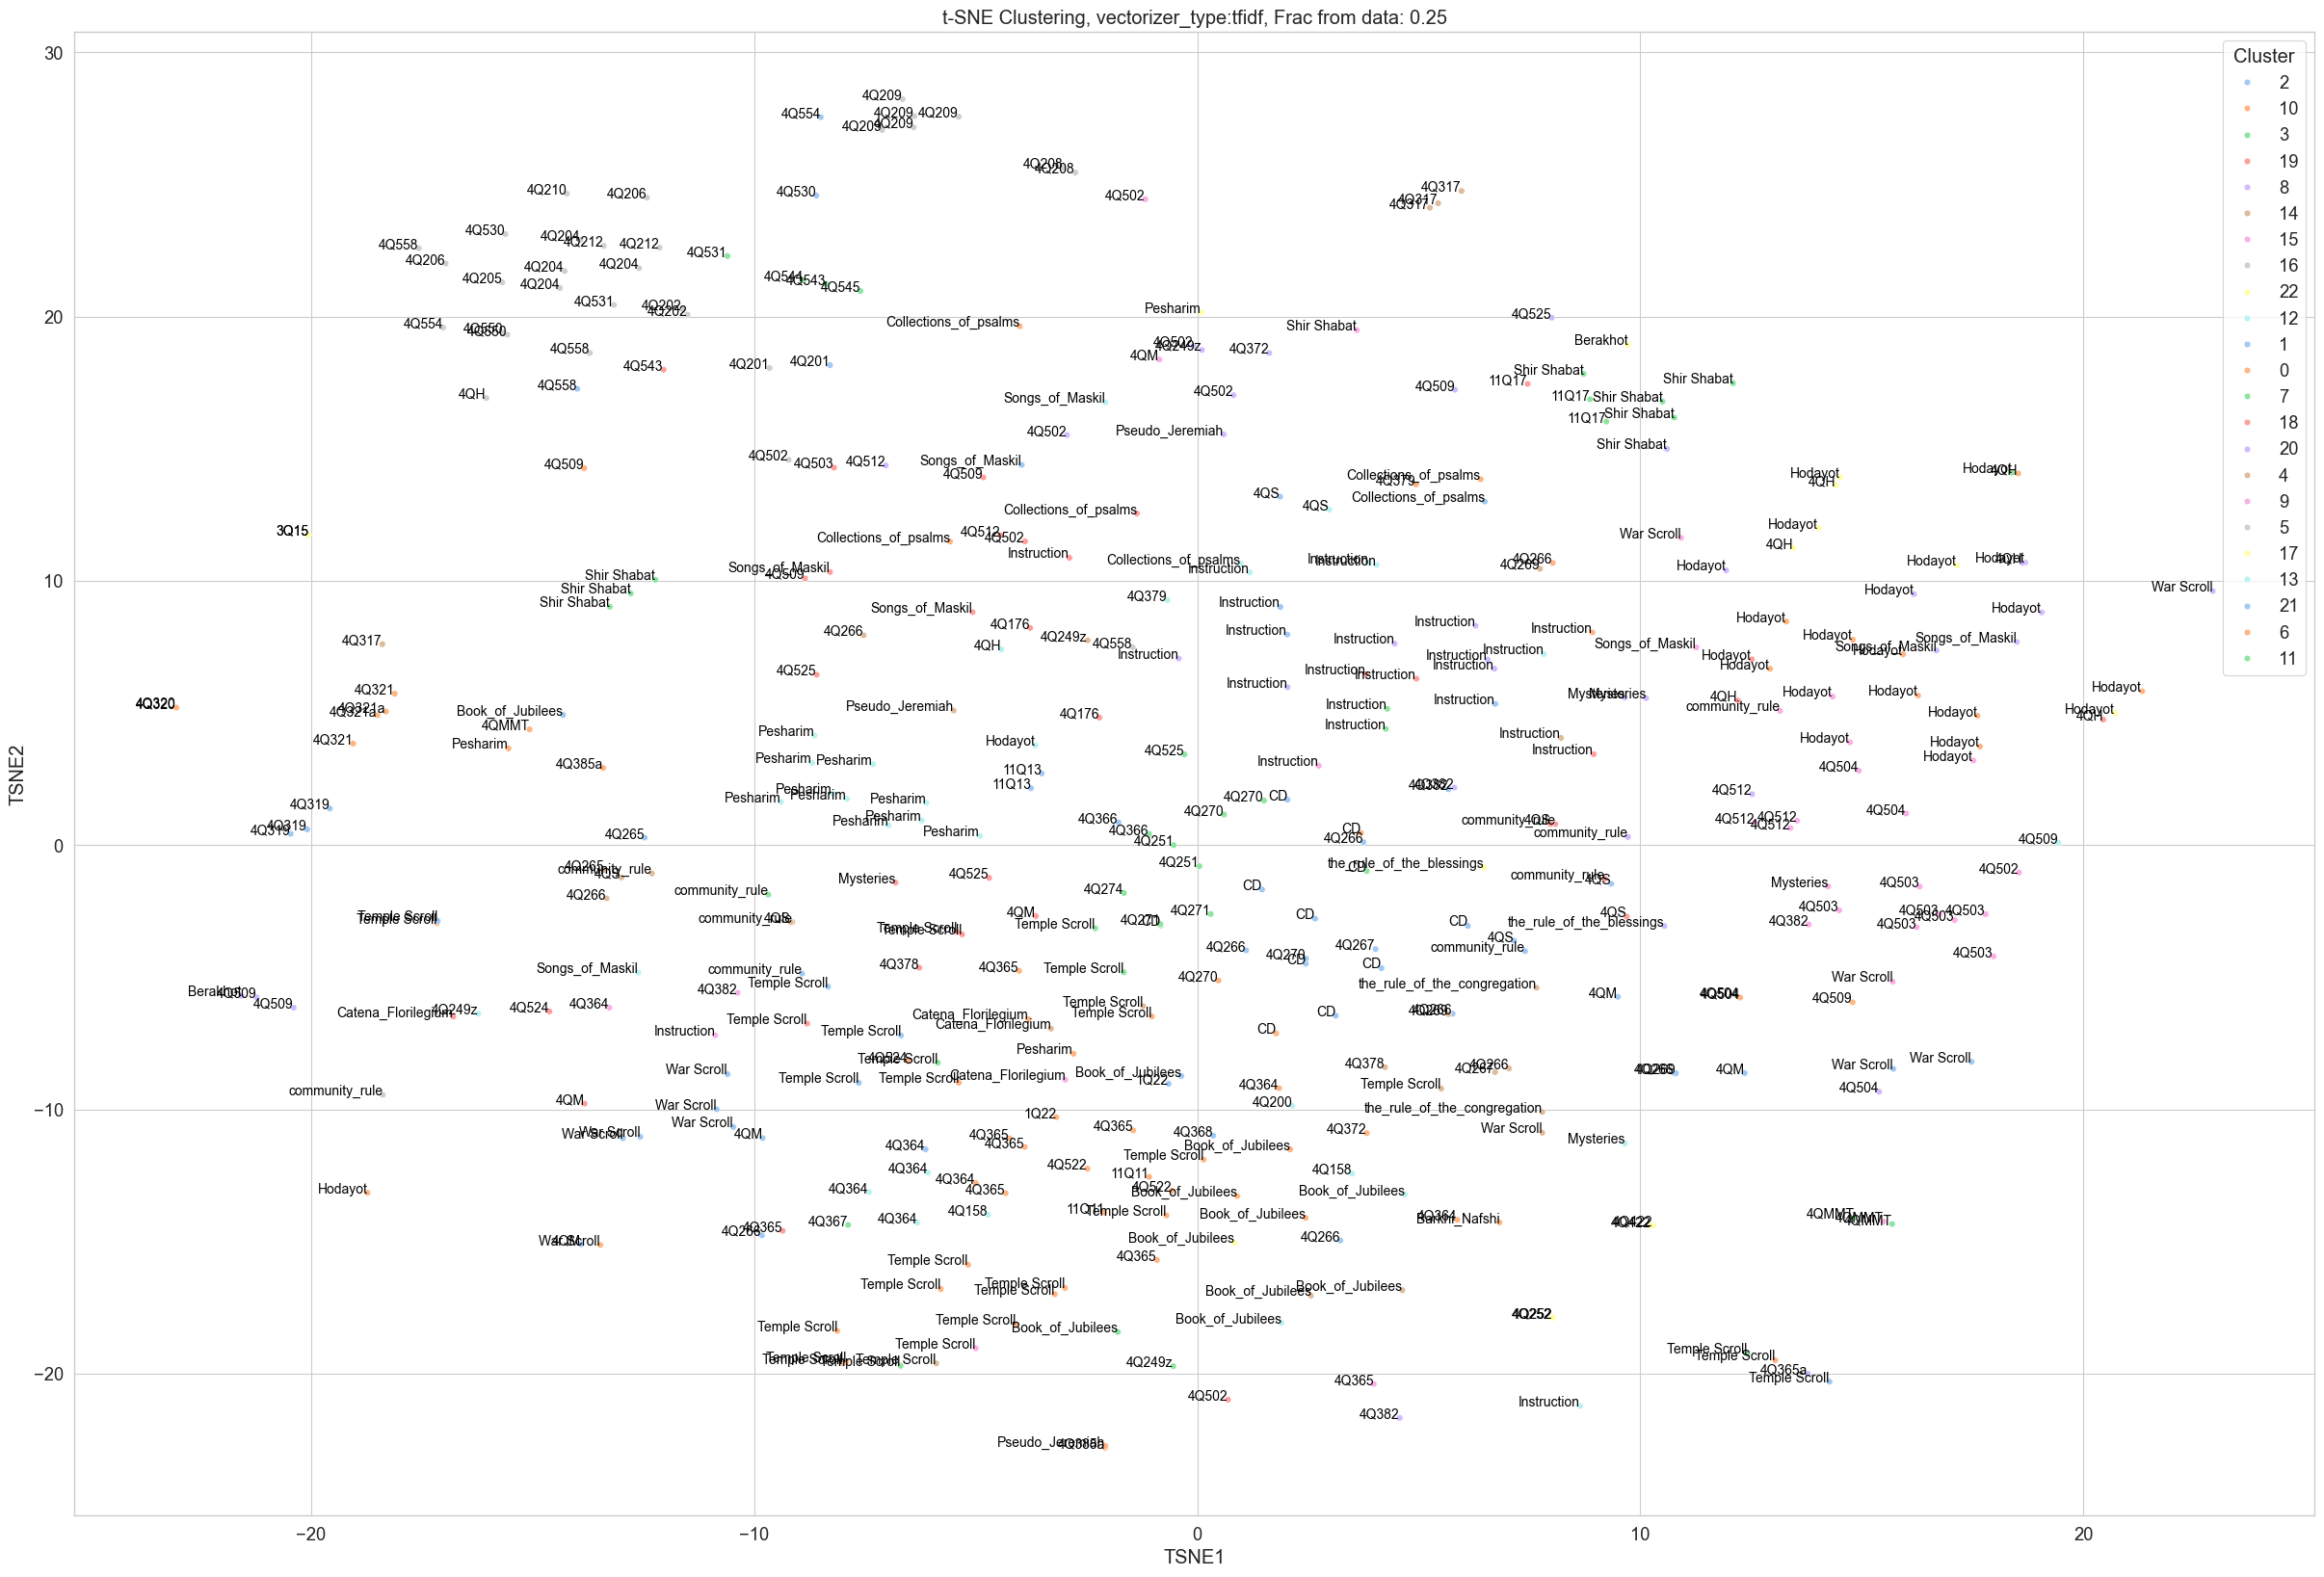

In [11]:

clusters = cluster_data(vectorizer_matrix, sampled_df["composition"].nunique() + 1)

plot_tsne(vectorizer_matrix, clusters, sampled_df['composition'].fillna(sampled_df['book']),
          metadata={"vectorizer_type": vectorizer_type, "frac": FRAC})


### Supervised

In [12]:
vectorizers = ["trigram",
               "tfidf",
               "bert", "starr"
               ]

In [13]:
from sklearn.metrics import adjusted_rand_score

FRAC = 1

clustering_label = 'composition'
df_sampled = stratified_sample(df, 'book', frac=FRAC, random_state=42)
df_sampled = df_sampled.dropna(subset=[clustering_label])
for vectorizer_type in vectorizers:
    X = vectorize_text(df_sampled, "text", vectorizer_type)

    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(df_sampled[clustering_label])

    X_train, X_test, y_train, y_test = train_test_split(X, encoded_labels, test_size=0.3, random_state=42)

    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    # Compute Jaccard Index
    jaccard_index = jaccard_score(y_test, y_pred, average='macro')
    rand_index = adjusted_rand_score(y_test, y_pred)
    print(f"{vectorizer_type}, Jaccard Index: {jaccard_index}")

    unique_classes = sorted(set(y_test))
    target_names = [label_encoder.inverse_transform([cls])[0] for cls in unique_classes]

# Print classification report
# print(classification_report(y_test, y_pred, labels=unique_classes, target_names=target_names))



trigram, Jaccard Index: 0.24122398430790457
tfidf, Jaccard Index: 0.25034451783934186


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/812 [00:00<?, ?it/s]

bert, Jaccard Index: 0.27841723891960474
starr, Jaccard Index: 0.21583140999824635


### 
Silhouette Score
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. The formula for the Silhouette Score for a single sample is:
$$ s = \frac{b - a}{\max(a, b)} $$
where $a$ is the mean distance to the other samples in the same cluster (cohesion), and $b$ is the mean distance to the samples in the nearest cluster (separation). A higher Silhouette Score is better, with a maximum of 1 indicating perfect clustering.

### Davies-Bouldin Index
The Davies-Bouldin Index evaluates the average similarity between each cluster and its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. The formula is:
$$ DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right) $$
where $\sigma$ is the average distance of all points in the cluster to the cluster centroid $c$, and $d(c_i, c_j)$ is the distance between centroids $c_i$ and $c_j$. A lower Davies-Bouldin Index indicates better clustering.

### Adjusted Rand Index
The Adjusted Rand Index is a measure of the similarity between two data clusterings, corrected for chance. It has a maximum of 1 and can be less than 0. The formula for the Adjusted Rand Index is:
$$ ARI = \frac{\sum_{ij} \binom{n_{ij}}{2} - [\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}}{\frac{1}{2} [\sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2}] - [\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}} $$
where $n_{ij}$ is the number of objects in both clusters $i$ and $j$, $a_i$ is the number of objects in cluster $i$, and $b_j$ is the number of objects in cluster $j$. Higher values are better.

### Mutual Information
Mutual Information measures the amount of information shared between two clusterings, reflecting how much knowing one of these clusterings reduces uncertainty about the other. The formula is:
$$ MI = \sum_{k,l} P(k,l) \log \frac{P(k,l)}{P(k)P(l)} $$
where $P(k,l)$ is the joint probability distribution function of clusterings $k$ and $l$, and $P(k)$ and $P(l)$ are the marginal probability distributions. Higher values indicate more shared information.

### Jaccard Index
The Jaccard Index, or Jaccard similarity coefficient, measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets:
$$ J(A,B) = \frac{|A \cap B|}{|A \cup B|} $$
where $A$ and $B$ are sets of labels. Higher values are better, indicating a greater overlap between the clusters compared to the total size.


In [15]:
DATA_PATH = f"{BASE_DIR}/notebooks/data/filtered_text_and_starr_features_{CHUNK_SIZE}_words_nonbib_17_06_2024.csv"
df = pd.read_csv(DATA_PATH)
DATA_PATH = f"{BASE_DIR}/notebooks/data/text_and_starr_features_{CHUNK_SIZE}_words_nonbib_17_06_2024.csv"
df_all = pd.read_csv(DATA_PATH)
df_all

,book,sentence_path,text_lex,text,n_words_lex,n_words,construct to absolute nouns ratio,construct nouns and adjectives percentage,noun to verb ratio,definite_article_percentage,...,preterite percentage,ky percentage,aCr percentage,oM percentage,kya percentage,all conjunctions percentage,non-finite to finite verbs ratio,passive verb forms percentage,total word count,bib
0,CD,CD:1:1-1:12,שמע כל ידע צדק בין מעשה אל ריב ל כל בשר משפט ע...,ועתה שמעו כל יודעי צדק ובינו במעשי אל כי ריב ל...,82,92,0.666667,0.110092,2.250000,0.917431,...,6.422018,0.0,0.0,0.0,0.0,21.100917,0.333333,0.000000,109.0,nonbib
1,CD,CD:1:12-2:1,אחרון עשה דור אחרון עדה בגד הם סור דרך היא עת ...,אחרונים את אשר עשה בדור אחרון בעדת בוגדים הם ס...,85,96,0.545455,0.114286,1.241379,4.761905,...,9.523810,0.0,0.0,0.0,0.0,14.285714,0.705882,0.000000,105.0,nonbib
2,CD,CD:2:1-2:10,כל המון מעשה נדה פנה שמע אל כל בוא ברית גלה אז...,את כל המונם ומעשיהם לנדה לפניו ועתה שמעו אלי כ...,79,94,0.481481,0.130841,2.222222,0.934579,...,2.803738,0.0,0.0,0.0,0.0,17.757009,0.800000,1.869159,107.0,nonbib
3,CD,CD:2:10-2:20,כל שנה עולם כל קום ל קריא שם יתר פליטה ארץ מלא...,לכל שני עולם ובכולם הקים לו קריאי שם למען התיר...,79,94,1.250000,0.205607,1.714286,0.934579,...,0.000000,0.0,0.0,0.0,0.0,17.757009,0.615385,1.869159,107.0,nonbib
4,CD,CD:2:20-3:8,בשר היה חרבה גוע היה היה עשה רצון שמר מצוה עשה...,בשר אשר היה בחרבה כי גוע ויהיו כלא היו בעשותם ...,81,95,1.100000,0.103774,1.000000,1.886792,...,9.433962,0.0,0.0,0.0,0.0,18.867925,0.217391,6.603774,106.0,nonbib
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445,Arugleviticus,Arugleviticus:fB+Cii:14-fB+Cii:16,מות נכה נפש בהמה שלם נפש תחת נפש,יומת ומכה נפש בהמה ישלמנה נפש תחת נפש,9,9,0.500000,0.083333,2.500000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,8.333333,1.000000,8.333333,12.0,bib
4446,Xjoshua,Xjoshua:1:1-2:9,צוה חזק אמץ ערץ חתת עם יהוה אלהים כל הלך צוה י...,הלוא צויתיך חזק ואמץ אל תערץ ואל תחת כי עמך יה...,62,78,1.333333,0.044944,1.045455,13.483146,...,3.370787,0.0,0.0,0.0,0.0,15.730337,0.466667,1.123596,89.0,bib
4447,Xjudges,Xjudges:f1:1-f3_7i:5,הלך יהודה כנעני ישב חברון שם חברון פנה קרית אר...,וילך יהודה אל הכנעני הישב בחברון ושם חברון לפנ...,80,93,-1.000000,0.074074,1.791667,7.407407,...,12.037037,0.0,0.0,0.0,0.0,23.148148,0.200000,0.000000,108.0,bib
4448,Xjudges,Xjudges:f3_7i:5-f3_7ii:1,משך הר תבור לקח עם עשרה אלף איש בן נפתלי בן זב...,ומשכת בהר תבור ולקחת עמך עשרת אלפים איש מבני נ...,42,54,6.000000,0.093750,1.333333,1.562500,...,3.125000,0.0,0.0,0.0,0.0,21.875000,0.090909,0.000000,64.0,bib


In [28]:
ss = df_all[df_all["bib"]=="nonbib"].groupby("book")["total word count"].sum().to_frame()
ss["more_than_300_word"] = ss["total word count"]>300
ss.sort_values(by="total word count").to_csv(f"{BASE_DIR}/notebooks/data/scrolls_by_word_count.csv")